**Входные данные**: данные по играм до 2016 года с информацией по продажам и оценкой критиков и пользователей.

**Цель**: выявить закономерности, определяющие успешность игры.

**Задачи**:  

Шаг 1. Откройте файл с данными и изучите общую информацию  
Путь к файлу: games.csv.  
Шаг 2. Подготовьте данные

    Замените названия столбцов (приведите к нижнему регистру);
    Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    Обработайте пропуски при необходимости:
        Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
        Опишите причины, которые могли привести к пропускам;
        Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных

    Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    Не учитывайте в работе данные за предыдущие годы.
    Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    Соотнесите выводы с продажами игр на других платформах.
    Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

    Как вы сформулировали нулевую и альтернативную гипотезы;
    Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод

**Целью проекта является выяснение определяющего успешность игры закономерности:**

**Будем исходить из краткого плана:**
1. **Вывести и изучить исходные данные;**
2. **Подготовить данные: изменить название столбцов, преобразовать их в нужные типы и обработать пропуски;**
3. **Провести исследовательский анализ данных. Изучить сколько игр выпускалось в разные годы, как менялись продажи по платформам, определить актуальный период и лидирующие платформы по продажам, построить график «ящик с усами» по глобальным продажам игр, проведен анализ влияния на продажи внутри одной популярной платформы отзывово пользователей и критиков и изучить общее распределение игр по жанрам;**
4. **Составить портерт пользователя кажого региона: описать самые популярные платформы, определить популярные жанры. Исследовать влияния рейтинга ESRB на продажи в региаонах;**
5. **Проверить гипотезы укзананные в Задачах;**
6. **Написать общий вывод.**

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Шаг 2. Подготовьте данные

**Замените названия столбцов (приведите к нижнему регистру)**

In [ ]:
data=data.rename(columns=str.lower)
#df.columns = df.columns.str.lower() - другой способ
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Поменял регистр названия колонок с помощью очень интересной совокупности методов

In [ ]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
print("количество строк с пропусками в оценках пользователей:",len(data[data['user_score'].isnull()==True]))

количество строк с пропусками в оценках пользователей: 6701


In [ ]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


**Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font color='DarkGreen'>Перевели тип данных по году выпуска игр.</font>

In [ ]:
data['year_of_release']=np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [ ]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Как видно из уникальных значений - в них отсутсвуют фактические дробные числа, хоть числа и имеют знак разделителя в виде точки числа после разделителя нет

**Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;**

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Что бы перевечти данные из  object во float нужно снчала уйти от tbd

In [ ]:
data.loc[data['user_score']=='tbd','tbd'] = 1
data.loc[data['user_score']!='tbd','tbd'] = 0
data.loc[data['user_score'].isna(),'tbd'] = None
data['tbd']=pd.to_numeric(data['tbd'], errors='coerce').astype('Int64')


Добавим столбец где 1 будет значит что рейтинг игры подлежит уточнению

In [ ]:
data['tbd'].unique()

<IntegerArray>
[0, <NA>, 1]
Length: 3, dtype: Int64

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
tbd                6701
dtype: int64

In [ ]:
data['tbd'].sum()

2424

In [ ]:
data[data.tbd==1].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,1
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,1
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,1
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,1
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,1


<font color='DarkGreen'>Заменим "tbd" на NaN. Это практически аналог пропусков.</font>

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
tbd                6701
dtype: int64

In [ ]:
data['user_score'].value_counts().reset_index().head(5)

,index,user_score
0,7.8,324
1,8,290
2,8.2,282
3,8.3,254
4,8.5,253


In [ ]:
data['user_score']=data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**Для изменения типа данных нужно убрать нечисловые значения - я решил во избежания потреи информации создать столбец с tbd где 0 - это было значение кроме tbd (число), 1 - где было tbd, далее я изменил tbd на пробуск потому что tbd - "to be determined", что переводится как "подлежит уточнению", так же подлежат уточениню и пропуски - так что по своей сути это строки имею один и тот же смысл.**

In [ ]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Как видно из уникальных значений - в них отсутсвуют фактические дробные числа, хоть числа и имеют знак разделителя в виде точки числа после разделителя нет

In [ ]:
data['critic_score']=np.floor(pd.to_numeric(data['critic_score'], errors='coerce')).astype('Int64')
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  tbd              10014 non-null  Int64  
dtypes: Int64(3), float64(5), object(4)
memory usage: 1.6+ MB


**Изменил тип данных в столбцах: в году релиза (с object на int), в оценки критиков (с object на int), в оценке пользователей (с object на float)  - что бы можно было взаимодействовать с данными по годам (складывать и выполнять арифметические и математические действия). В первых двух сделал int что бы данные смотрелись лучше. ***

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Обработайте пропуски при необходимости:**

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
tbd                6701
dtype: int64

In [ ]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN,<NA>
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN,<NA>


В данных две строки с названием игры без имени и  тем более в этих строках еще хватает пропусков по другим колонкам.. Можно удалить эти строки, т.к. они не повлияют на общую статистику

In [ ]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  tbd              10014 non-null  Int64  
dtypes: Int64(3), float64(5), object(4)
memory usage: 1.6+ MB


In [ ]:
def year_in_name(row):
    if pd.isna(row['year_of_release']):
        for i in row['name'].split():
            if i.isdigit() and int(i)>=1980:
                return int(i)
    else:
        return row['year_of_release']
data['year_of_release'] = data.apply(year_in_name, axis=1)
print(f"В столбце year_of_release {data['year_of_release'].isna().sum()} пропуска.")

В столбце year_of_release 254 пропуска.


In [ ]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0


Удалям 254 строки, в названии игры которой отсусвтует год выпуска игры(пропуски).

In [ ]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74,7.9,E10+,0
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,<NA>,NaN,NaN,<NA>
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92,8.2,T,0
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73,NaN,E,1
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78,6.6,E10+,0


In [ ]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [ ]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0


In [ ]:
data['year_of_release']=np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0


«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:

ИНФОРМАЦИЯ ИЗ ВИКИПЕДИИ - СТАТЬЯ:"Entertainment Software Rating Board"

In [ ]:
data.loc[data['rating'].isna(), 'rating'] = 'RP'

<font color='DarkMagenta'>Если посмотреть в интернете, что такое рейтинг ESRB, то мы узнаем, что это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.</font>

In [ ]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating                0
tbd                6609
dtype: int64

**В других столбцах нет пропусков или не хватает информации как от них избавится**

In [ ]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0


In [ ]:
data.duplicated().sum()

0

Нет дубликатов

In [ ]:
data[['name'	,'platform']].duplicated().sum()

3

In [ ]:
hiden_duplicates=data[data[['name'	,'platform']].duplicated(keep=False )].sort_values(by=['name','platform','year_of_release'])
hiden_duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
603,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E,0
15983,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E,0
5892,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0
11544,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T,0
1577,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,0
1180,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,0


In [ ]:
data.loc[(data.name=='Need for Speed: Most Wanted') * (data.year_of_release==2005),'name']='Need for Speed: Most Wanted (2005)'
data.loc[(data.name=='Need for Speed: Most Wanted') * (data.year_of_release==2012),'name']='Need for Speed: Most Wanted (2012)'
data.loc[data.index==603,['na_sales',	'eu_sales',	'jp_sales',	'other_sales']]=data.loc[[603,15983],['na_sales',	'eu_sales',	'jp_sales',	'other_sales']].sum().values
data=data.drop(index=15983).reset_index(drop=True)
hiden_duplicates=data[data[['name'	,'platform']].duplicated(keep=False )].sort_values(by=['name','platform','year_of_release'])
hiden_duplicates


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd


In [ ]:
x=data.pivot_table(index=['name','platform'],values='year_of_release',aggfunc='count').sort_values(by='year_of_release')
x[x.year_of_release>1]

,,year_of_release
name,platform,


In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,RP,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,RP,<NA>


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Опишите причины, которые могли привести к пропускам;**

**Причина может крыться в недостатке информации при заполнении, и/или ошибки при заполнении информации, иногда это может быть закономерная ошибка при обработке данных которая может снести часть данных**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [ ]:
#data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data['total_sales']= data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,RP,<NA>,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,RP,<NA>,31.38


**В данном разделе был проведен анализ данных на наличие ошибок и пропусков и преобразование данных к нужному типу.
Названия столбцов приведены к нижнему регистру.
Удалены строки с играми без названия.
В столбцы с годом выпуска были добавлены годы выпуска игр из их названий. Строки без дат выпуска были удалены.
Столбцы с рейтингами критиков и пользователей были заполнены медианными значениями в соответсвии с жанром игр.
Столбцы с рейтингом ESRB для игр выпущенных в 2016 году были заполнены рейтингом "RP". Остальные пропуски были оставлены как есть.
Для столбца с рейтингом пользователя был назначен тип "float".
Для столбцов с рейтингом критиков и и годом выпуска был назначен тип "int".
Были посчитаны суммарные продажи во всех регионах. Данные занесены в столбец "total_sales".**

In [ ]:
temp = data.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  Int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7993 non-null   Int64  
 9   user_score       7471 non-null   float64
 10  rating           16458 non-null  object 
 11  tbd              9849 non-null   Int64  
 12  total_sales      16458 non-null  float64
dtypes: Int64(3), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'ww

# Шаг 3. Проведите исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  Int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7993 non-null   Int64  
 9   user_score       7471 non-null   float64
 10  rating           16458 non-null  object 
 11  tbd              9849 non-null   Int64  
 12  total_sales      16458 non-null  float64
dtypes: Int64(3), float64(6), object(4)
memory usage: 1.7+ MB


In [ ]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0,82.54


In [ ]:
platform_years_min_max=data.pivot_table(index=['platform','year_of_release'],values='name',aggfunc='count').reset_index()
platform_years_min_max

,platform,year_of_release,name
0,2600,1980,9
1,2600,1981,46
2,2600,1982,36
3,2600,1983,11
4,2600,1984,1
...,...,...,...
233,XB,2008,1
234,XOne,2013,19
235,XOne,2014,61
236,XOne,2015,80


In [ ]:
platform_years_min_max=platform_years_min_max.pivot_table(index='platform',values='year_of_release',
                                                          aggfunc=['min','max','mean','median'])
platform_years_min_max.columns=['first_year','last_year','mean_year','median_year']
platform_years_min_max

,first_year,last_year,mean_year,median_year
platform,,,,
2600,1980,1989,1984.5,1984.5
3DO,1994,1995,1994.5,1994.5
3DS,2011,2016,2013.5,2013.5
DC,1998,2008,2002.142857,2001.0
DS,1985,2013,2006.363636,2008.0
GB,1988,2001,1994.615385,1995.0
GBA,2000,2007,2003.5,2003.5
GC,2001,2007,2004.0,2004.0
GEN,1990,1994,1992.0,1992.0


In [ ]:
platform_years_min_max=data.pivot_table(index=['platform','year_of_release'],values='name',aggfunc='count').reset_index()
platform_years_min_max

,platform,year_of_release,name
0,2600,1980,9
1,2600,1981,46
2,2600,1982,36
3,2600,1983,11
4,2600,1984,1
...,...,...,...
233,XB,2008,1
234,XOne,2013,19
235,XOne,2014,61
236,XOne,2015,80


In [ ]:
platform_years_min_max=platform_years_min_max.pivot_table(index='platform',values='year_of_release',
                                                          aggfunc=['min','max','mean','median'])
platform_years_min_max.columns=['first_year','last_year','mean_year','median_year']
platform_years_min_max['delta']=platform_years_min_max['last_year']-platform_years_min_max['first_year']
display(platform_years_min_max.head())
display(platform_years_min_max.tail())

,first_year,last_year,mean_year,median_year,delta
platform,,,,,
2600,1980,1989,1984.5,1984.5,9
3DO,1994,1995,1994.5,1994.5,1
3DS,2011,2016,2013.5,2013.5,5
DC,1998,2008,2002.142857,2001.0,10
DS,1985,2013,2006.363636,2008.0,28


,first_year,last_year,mean_year,median_year,delta
platform,,,,,
Wii,2006,2016,2011.0,2011.0,10
WiiU,2012,2016,2014.0,2014.0,4
X360,2005,2016,2010.5,2010.5,11
XB,2000,2008,2004.0,2004.0,8
XOne,2013,2016,2014.5,2014.5,3


In [ ]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0,82.54


In [ ]:
games_year=data.groupby('year_of_release')['name'].count().reset_index()
games_year.set_index('year_of_release',inplace=True)
games_year.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


In [ ]:
games_year['year_of_release']=games_year.index
games_year.head()

,name,year_of_release
year_of_release,,
1980,9,1980
1981,46,1981
1982,36,1982
1983,17,1983
1984,14,1984


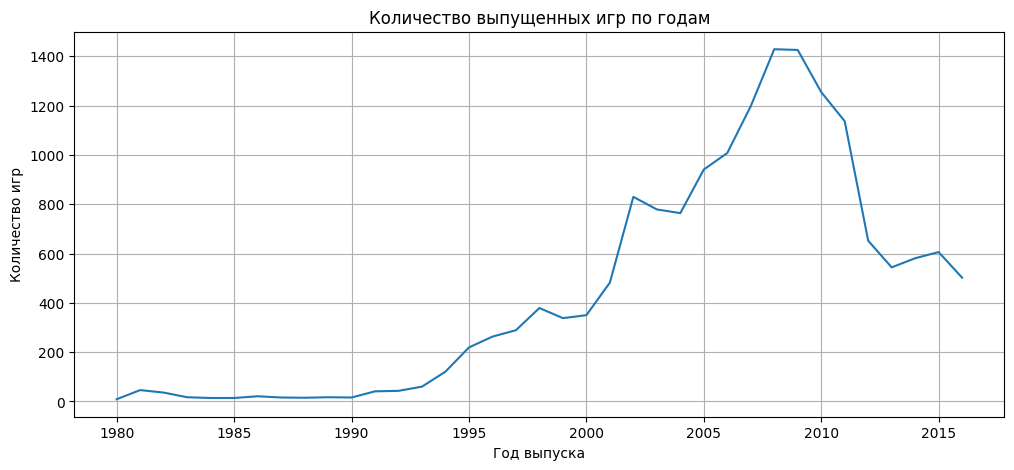

In [ ]:
plt.figure(figsize=(12,5))
data.groupby('year_of_release').agg('count').na_sales.plot()
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)

In [ ]:
games_year.tail()

,name,year_of_release
year_of_release,,
2012,652,2012
2013,544,2013
2014,581,2014
2015,606,2015
2016,502,2016


In [ ]:
games_year_cut=games_year[games_year['year_of_release']>=2013]
games_year_cut

,name,year_of_release
year_of_release,,
2013,544,2013
2014,581,2014
2015,606,2015
2016,502,2016


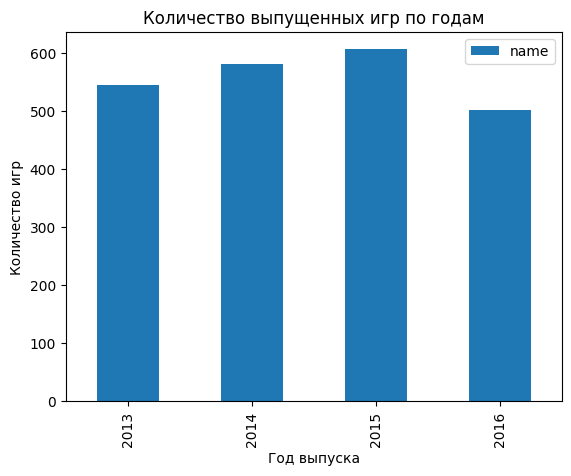

In [ ]:
games_year_cut.plot.bar(x='year_of_release', y='name')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

**Оставим только данные за актуальный период, который ближе к 2017-му. Слишком ранние данные нам не подойдут, потому что тренды сильно меняются. Оставим данные только с 2013 года.**

**Актуальным примем период между началом продаж PS4 и XOne: 2013 год до 2016 года**

Ниже приведено почему

благодоря ящику с усами можно отсечь годы начала производства игр - они не отображают более современные тенденции или разбить периоды на группы (если для нас 20 произведенных игра в год это мало то в 80 это могло быть большим количеством)

In [ ]:
print('Начало продаж PS4 и XOne:',
      data[(data['platform']=='PS4') | (data['platform']=='XOne')]['year_of_release'].min())

Начало продаж PS4 и XOne: 2013


**Актуальным примем период между началом продаж PS4 и XOne: 2013 год до 2016 года**

In [ ]:
games_year.year_of_release.min()

1980

In [ ]:
actual_games=data.loc[data['year_of_release']>=2013]
data_new=data.loc[data['year_of_release']>=2013]
year_platform_modern=data_new.pivot_table(index='platform',values=['name','year_of_release','total_sales'],
                 aggfunc={'name': 'count','year_of_release': ['mean','max','median','min'],'total_sales':'sum'})
year_platform_modern.columns=['quantity','total_sales','last_year','mean','median','first_year']
year_platform_modern=year_platform_modern.loc[year_platform_modern['last_year']==2016].sort_values(by='total_sales',ascending=False)
year_platform_modern
ind=year_platform_modern.index
actual_games=actual_games.query('platform in @ind')
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,0,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,0,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,RP,<NA>,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,RP,<NA>,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,0,12.62


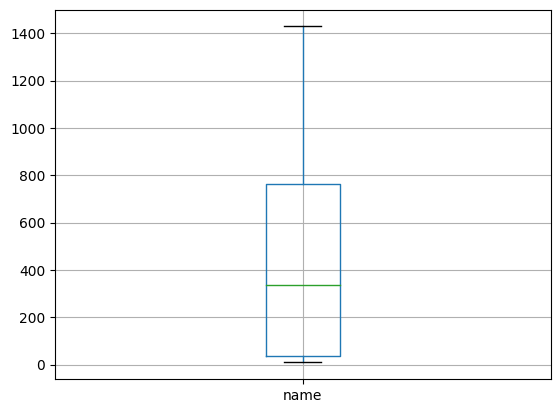

In [ ]:
games_year.boxplot(column=['name']);

**Построим график «ящик с усами» по 5 популярным платформам**

In [ ]:
pop_platform = actual_games[
    ((actual_games['platform']=='X360') |
    (actual_games['platform']=='PS3') |
    (actual_games['platform']=='PC') |
    (actual_games['platform']=='PS4') |
    (actual_games['platform']=='XOne'))
][['platform', 'total_sales']]

In [ ]:
pop_platform.groupby('platform').describe().sort_values(by=('total_sales', 'mean'),ascending=False)

total_sales                                                     
               count      mean       std   min   25%    50%    75%    max
platform                                                                 
PS4            392.0  0.801378  1.609456  0.01  0.06  0.200  0.730  14.63
X360           186.0  0.735484  1.663275  0.01  0.08  0.265  0.795  16.27
XOne           247.0  0.645020  1.036139  0.01  0.06  0.220  0.685   7.39
PS3            345.0  0.525884  1.451939  0.01  0.04  0.150  0.510  21.05
PC             189.0  0.208624  0.352304  0.01  0.03  0.080  0.230   3.05

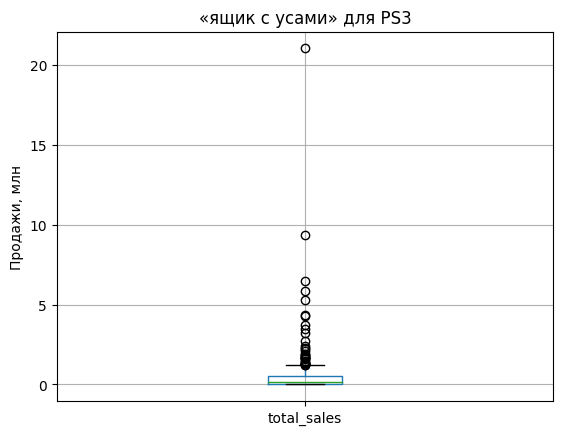

In [ ]:
actual_games.query('platform=="PS3"').boxplot(column=['total_sales'])
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для PS3');

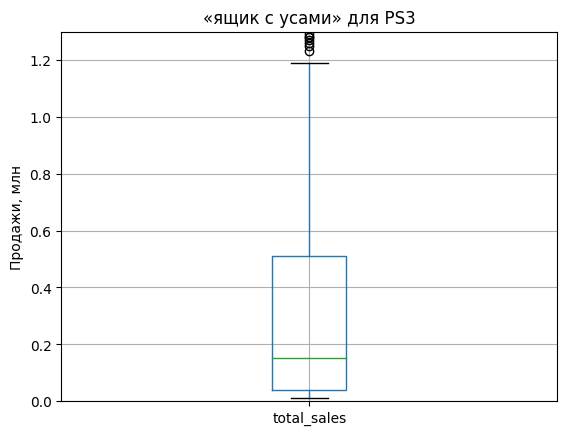

In [ ]:
actual_games.query('platform=="PS3"').boxplot(column=['total_sales'])
plt.ylim(0,1.3)
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для PS3');

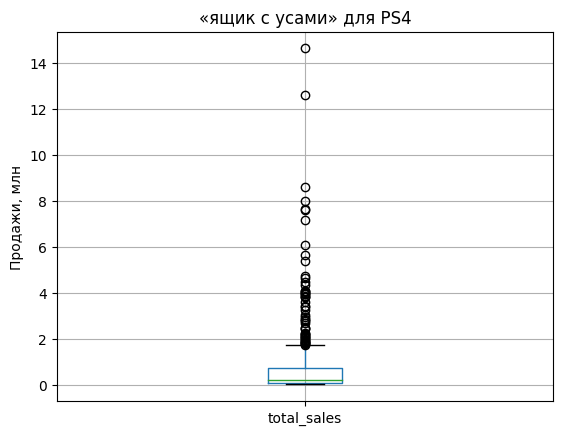

In [ ]:
actual_games.query('platform=="PS4"').boxplot(column=['total_sales'])
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для PS4');

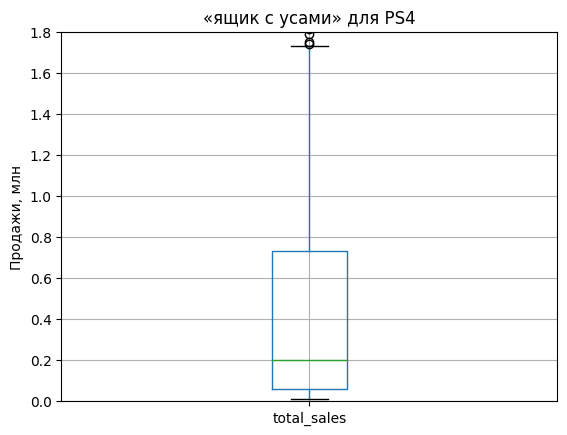

In [ ]:
actual_games.query('platform=="PS4"').boxplot(column=['total_sales'])
plt.ylim(0,1.8)
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для PS4');

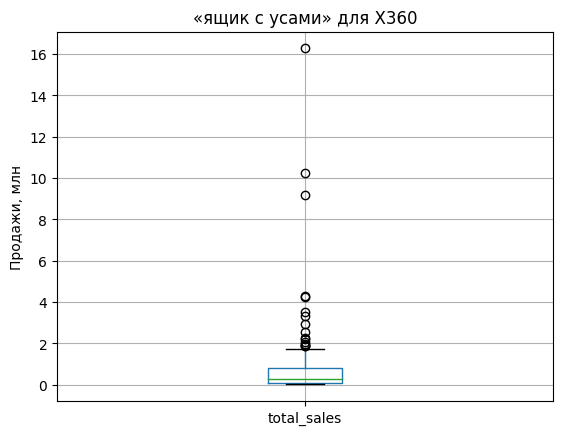

In [ ]:
actual_games.query('platform=="X360"').boxplot(column=['total_sales'])
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для X360');

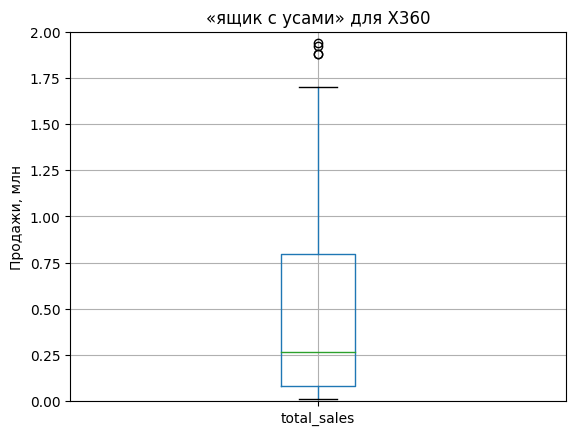

In [ ]:
actual_games.query('platform=="X360"').boxplot(column=['total_sales'])
plt.ylim(0,2)
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для X360');

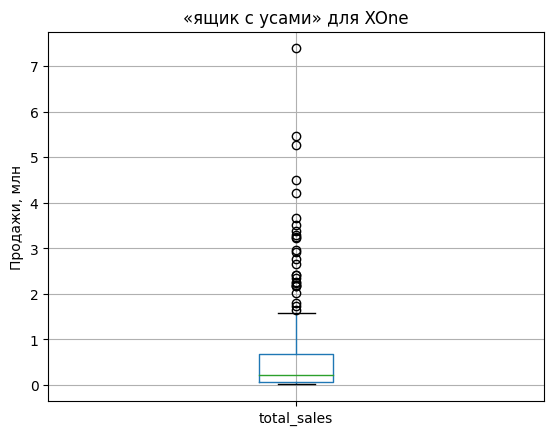

In [ ]:
actual_games.query('platform=="XOne"').boxplot(column=['total_sales'])
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для XOne');

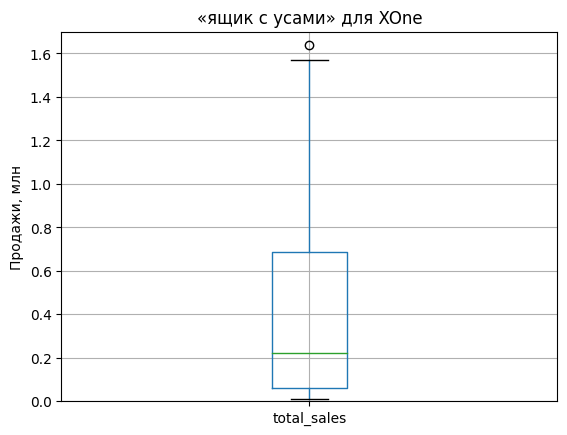

In [ ]:
actual_games.query('platform=="XOne"').boxplot(column=['total_sales'])
plt.ylim(0,1.7)
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для XOne');

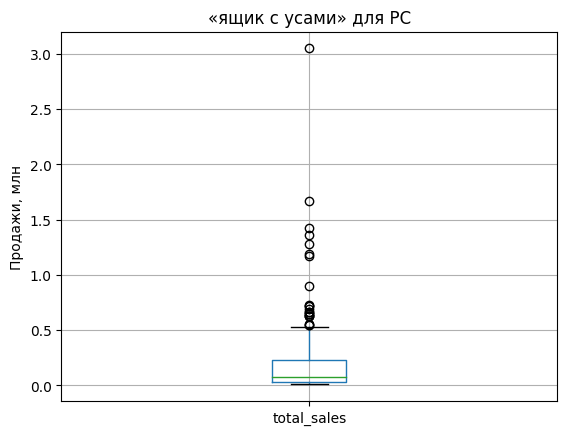

In [ ]:
actual_games.query('platform=="PC"').boxplot(column=['total_sales'])
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для PC');

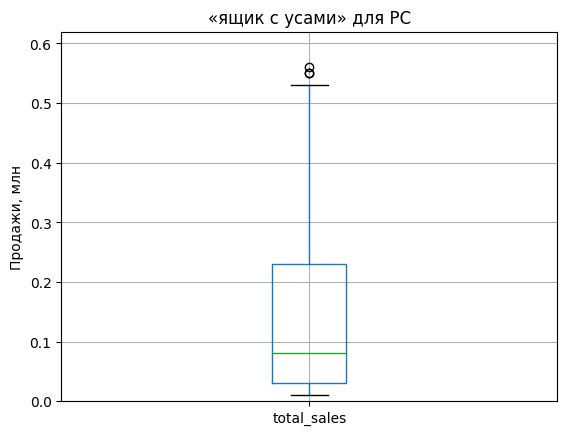

In [ ]:
actual_games.query('platform=="PC"').boxplot(column=['total_sales'])
plt.ylim(0,0.62)
plt.ylabel('Продажи, млн')
plt.title('«ящик с усами» для PC');


<font color='DarkMagenta'> Также можно построить диаграммы размаха на одной координатной сетке в двух видах, со всеми выбросами и с крупными боксплотами.</font>

In [ ]:
data_x=data

Cделаем два экземпляра диаграмм размаха, одну полную с выбросами, вторую масштабированную с отображением только нижней части boxplot-ов, что бы были видны медиана и 75% квантиль. Для этого надо использовать параметр ylim().

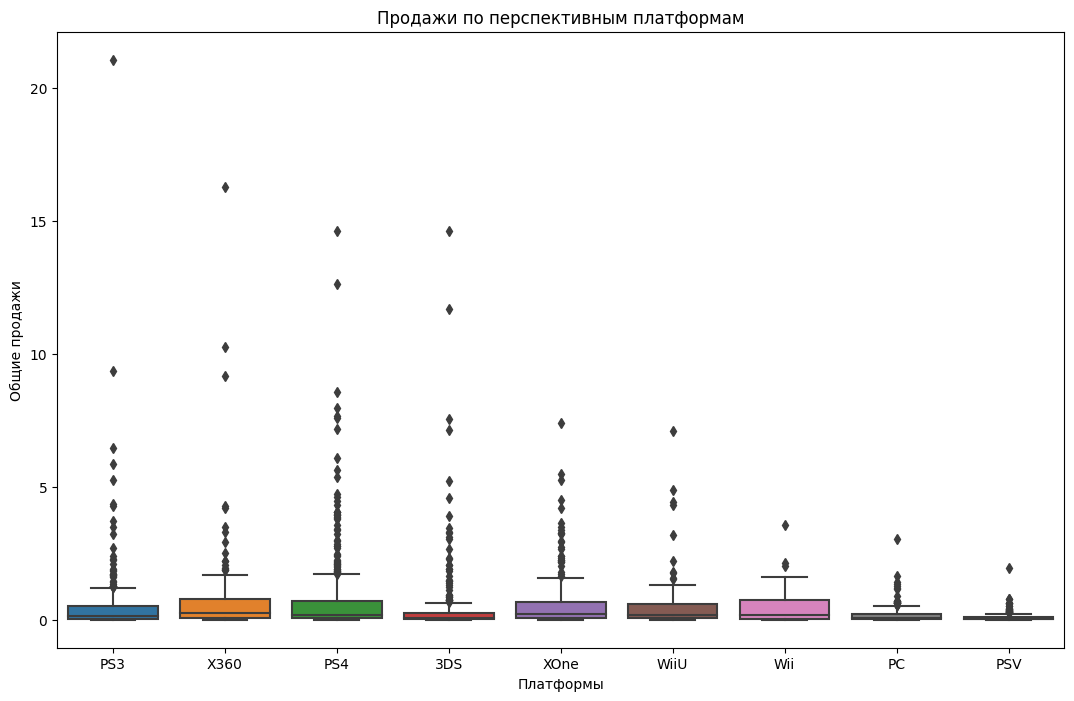

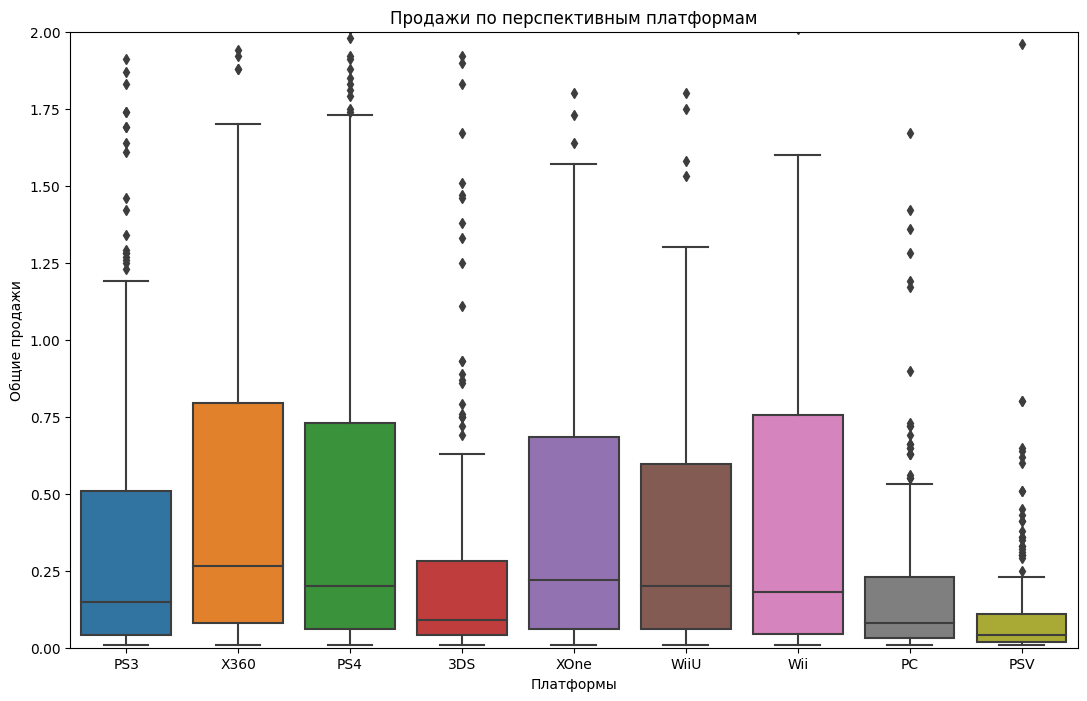

In [ ]:
import seaborn as sns
actual_games, y = actual_games, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_games, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_games, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

In [ ]:
games_year_info=games_year['name'].describe().reset_index()
games_year_info

,index,name
0,count,37.000000
1,mean,444.810811
2,std,452.075881
3,min,9.000000
4,25%,36.000000
5,50%,338.000000
6,75%,764.000000
7,max,1429.000000


In [ ]:
median_q_games_year=games_year_info.loc[games_year_info['index']=='50%','name'].reset_index()
first_q_games_year=games_year_info.loc[games_year_info['index']=='25%','name'].reset_index()
third_q_games_year=games_year_info.loc[games_year_info['index']=='75%','name'].reset_index()
left_mustache_games_year=first_q_games_year['name']-1.5*(third_q_games_year['name']-first_q_games_year['name'])
rihgt_mustache_games_year=third_q_games_year['name'] + 1.5*(third_q_games_year['name'] - first_q_games_year['name'])
print('Левый ус=',left_mustache_games_year.iloc[0])
print('Правый ус=',rihgt_mustache_games_year.iloc[0])

Левый ус= -1056.0
Правый ус= 1856.0


In [ ]:
min_games_year=games_year_info.loc[games_year_info['index']=='min','name'].iloc[0]
min_games_year

9.0

In [ ]:
if min_games_year>=left_mustache_games_year.iloc[0]:
    print("левый ус РАВЕН минимальному значению или меньше, но должен быть приравнен")
else:
    print("левый ус НЕ равен минимальному значению")

левый ус РАВЕН минимальному значению или меньше, но должен быть приравнен


In [ ]:
max_games_year=games_year_info.loc[games_year_info['index']=='max','name'].iloc[0]
max_games_year

1429.0

In [ ]:
if max_games_year<=rihgt_mustache_games_year.iloc[0]:
    print("правый ус РАВЕН минимальному значению или больше, но должен быть приравнен")
else:
    print("правый ус НЕ равен минимальному значению")

правый ус РАВЕН минимальному значению или больше, но должен быть приравнен


 Значит с помощью ящика с усами нельзя отсечь данные

In [ ]:
median_q_games_year['name'].iloc[0]

338.0

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [ ]:
actual_games.groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
Wii      23
Name: name, dtype: int64

In [ ]:
year_platform=data.pivot_table(index='platform',values=['name','year_of_release','total_sales'],
                 aggfunc={'name':'count','year_of_release': ['mean','max','median','min'],'total_sales':'sum'})
year_platform

name total_sales year_of_release                           
         count         sum             max         mean  median   min
platform                                                             
2600       116       86.48            1989  1982.137931  1982.0  1980
3DO          3        0.10            1995  1994.666667  1995.0  1994
3DS        512      257.81            2016  2013.126953  2013.0  2011
DC          52       15.95            2008  1999.942308  2000.0  1998
DS        2122      802.79            2013  2008.185203  2008.0  1985
GB          97      254.43            2001  1995.958763  1997.0  1988
GBA        811      312.88            2007  2003.210851  2003.0  2000
GC         543      197.03            2007  2003.399632  2003.0  2001
GEN         27       28.35            1994  1993.037037  1993.0  1990
GG           1        0.04            1992       1992.0  1992.0  1992
N64        316      218.01            2002  1998.531646  1999.0  1996
NES         98      251.05            1994  1987.153061  1986.5  1983
NG          12        1.44            1996       1994.5  1994.5  1993
PC         957      255.76            2016  2008.914316  2010.0  1985
PCFX         1        0.03            1996       1996.0  1996.0  1996
PS        1190      727.58            2003  1998.005882  1998.0  1994
PS2       2134     1247.28            2011  2004.583411  2005.0  2000
PS3       1305      931.34            2016  2010.839847  2011.0  2006
PS4        392      314.14            2016  2015.145408  2015.0  2013
PSP       1194      289.54            2015  2008.731156  2009.0  2004
PSV        429       53.81            2016  2014.132867  2014.0  2011
SAT        173       33.59            1999  1996.028902  1996.0  1994
SCD          6        1.86            1994  1993.833333  1994.0  1993
SNES       239      200.04            1999  1993.845188  1994.0  1990
TG16         2        0.16            1995       1995.0  1995.0  1995
WS           6        1.42            2001       2000.0  2000.0  1999
Wii       1286      891.18            2016  2008.966563  2009.0  2006
WiiU       147       82.19            2016  2013.659864  2013.0  2012
X360      1234      961.30            2016  2009.879254  2010.0  2005
XB         806      252.66            2008  2003.635236  2004.0  2000
XOne       247      159.32            2016  2014.951417  2015.0  2013

In [ ]:
year_platform.columns=['quantity','total_sales','last_year','mean','median','first_year']
year_platform=year_platform.sort_values(by='total_sales',ascending=False)
year_platform

,quantity,total_sales,last_year,mean,median,first_year
platform,,,,,,
PS2,2134,1247.28,2011,2004.583411,2005.0,2000
X360,1234,961.30,2016,2009.879254,2010.0,2005
PS3,1305,931.34,2016,2010.839847,2011.0,2006
Wii,1286,891.18,2016,2008.966563,2009.0,2006
DS,2122,802.79,2013,2008.185203,2008.0,1985
PS,1190,727.58,2003,1998.005882,1998.0,1994
PS4,392,314.14,2016,2015.145408,2015.0,2013
GBA,811,312.88,2007,2003.210851,2003.0,2000
PSP,1194,289.54,2015,2008.731156,2009.0,2004


In [ ]:
year_platform['lifetime']=year_platform['last_year']-year_platform['first_year']
year_platform['lifetime']=year_platform['lifetime'].astype('int')
year_platform['first_year']=year_platform['first_year'].astype('int')
year_platform['median']=year_platform['median'].astype('int')
year_platform['last_year']=year_platform['last_year'].astype('int')
year_platform['last_year']=year_platform['last_year'].astype('float')
year_platform.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, PS2 to PCFX
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   quantity     31 non-null     int64  
 1   total_sales  31 non-null     float64
 2   last_year    31 non-null     float64
 3   mean         31 non-null     Float64
 4   median       31 non-null     int64  
 5   first_year   31 non-null     int64  
 6   lifetime     31 non-null     int64  
dtypes: Float64(1), float64(2), int64(4)
memory usage: 2.0+ KB


In [ ]:
year_platform.sort_values(by='lifetime',ascending=False)

,quantity,total_sales,last_year,mean,median,first_year,lifetime
platform,,,,,,,
PC,957,255.76,2016.0,2008.914316,2010,1985,31
DS,2122,802.79,2013.0,2008.185203,2008,1985,28
GB,97,254.43,2001.0,1995.958763,1997,1988,13
PS2,2134,1247.28,2011.0,2004.583411,2005,2000,11
X360,1234,961.30,2016.0,2009.879254,2010,2005,11
PSP,1194,289.54,2015.0,2008.731156,2009,2004,11
NES,98,251.05,1994.0,1987.153061,1986,1983,11
PS3,1305,931.34,2016.0,2010.839847,2011,2006,10
Wii,1286,891.18,2016.0,2008.966563,2009,2006,10


Очевидно что за время наблюдний людером является ПК(31 год), так же неожиданным результатом может похвастаться DS - 28 лет, на третьем месте GB - с 13 годами, 4 место делят PS2, PSP, X360 и NES -- 11 лет

In [ ]:
year_platform.first_year.min()

1980

(0.0, 15.0)

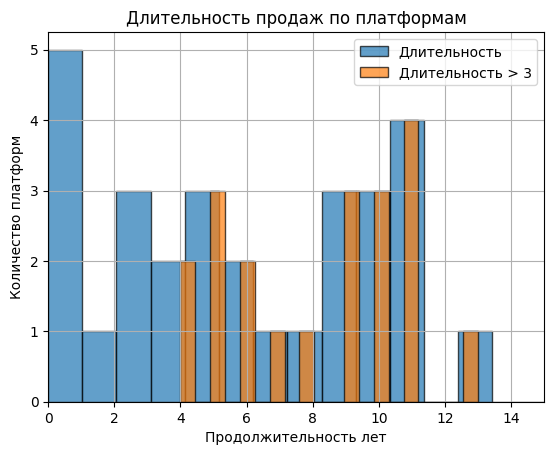

In [ ]:
year_platform['lifetime'].hist(bins=30, edgecolor='black', alpha=0.7)
(year_platform[
(        year_platform['lifetime'] > 3) &
        (year_platform['lifetime'] < 25)]['lifetime'].hist(bins=20, edgecolor='black', alpha=0.7));
plt.xlabel('Продолжительность лет')
plt.ylabel('Количество платформ')
plt.title('Длительность продаж по платформам')
plt.legend(['Длительность', 'Длительность > 3']);
plt.xlim(0,15)

In [ ]:
year_platform['lifetime'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifetime, dtype: float64

In [ ]:
print('Среднее время жизни игровой платформы:',year_platform['lifetime'].mean().round(2))

Среднее время жизни игровой платформы: 7.61


In [ ]:
print('Медианное время жизни игровой платформы:',year_platform['lifetime'].median())

Медианное время жизни игровой платформы: 6.0


**В целом основываясь на данных можно сказать, что за 6 лет у половины приставок кончится жизненный цикл**

In [ ]:
year_platform_new=year_platform.query('last_year==2016')
year_platform_new

,quantity,total_sales,last_year,mean,median,first_year,lifetime
platform,,,,,,,
X360,1234,961.30,2016.0,2009.879254,2010,2005,11
PS3,1305,931.34,2016.0,2010.839847,2011,2006,10
Wii,1286,891.18,2016.0,2008.966563,2009,2006,10
PS4,392,314.14,2016.0,2015.145408,2015,2013,3
3DS,512,257.81,2016.0,2013.126953,2013,2011,5
PC,957,255.76,2016.0,2008.914316,2010,1985,31
XOne,247,159.32,2016.0,2014.951417,2015,2013,3
WiiU,147,82.19,2016.0,2013.659864,2013,2012,4
PSV,429,53.81,2016.0,2014.132867,2014,2011,5


In [ ]:
mean_median_year=year_platform_new.sort_values(by='lifetime',ascending=False)
mean_median_year

,quantity,total_sales,last_year,mean,median,first_year,lifetime
platform,,,,,,,
PC,957,255.76,2016.0,2008.914316,2010,1985,31
X360,1234,961.30,2016.0,2009.879254,2010,2005,11
PS3,1305,931.34,2016.0,2010.839847,2011,2006,10
Wii,1286,891.18,2016.0,2008.966563,2009,2006,10
3DS,512,257.81,2016.0,2013.126953,2013,2011,5
PSV,429,53.81,2016.0,2014.132867,2014,2011,5
WiiU,147,82.19,2016.0,2013.659864,2013,2012,4
PS4,392,314.14,2016.0,2015.145408,2015,2013,3
XOne,247,159.32,2016.0,2014.951417,2015,2013,3


In [ ]:
print('Медианное время жизни СОВРЕМЕННОЙ игровой платформы:',mean_median_year['lifetime'].median())

Медианное время жизни СОВРЕМЕННОЙ игровой платформы: 5.0


In [ ]:
print('Среднее время жизни СОВРЕМЕННОЙ игровой платформы:',mean_median_year['lifetime'].mean().round(2))

Среднее время жизни СОВРЕМЕННОЙ игровой платформы: 9.11


**Для всех платформ среднее и медианное время жизни время равно 7,61 и 6 годам соотвественно. Для современных и популярных платформ 9,1 и 5 лет соотвтественно.**

Количество игр тут для всего периода - то есть тут не учитывается подсчет игра за год начиная с 2013

In [ ]:
data_new=data.loc[data['year_of_release']>=2013]
year_platform_modern=data_new.pivot_table(index='platform',values=['name','year_of_release','total_sales'],
                 aggfunc={'name': 'count','year_of_release': ['mean','max','median','min'],'total_sales':'sum'})
year_platform_modern.columns=['quantity','total_sales','last_year','mean','median','first_year']
year_platform_modern=year_platform_modern.loc[year_platform_modern['last_year']==2016].sort_values(by='total_sales',ascending=False)
year_platform_modern

,quantity,total_sales,last_year,mean,median,first_year
platform,,,,,,
PS4,392,314.14,2016,2015.145408,2015.0,2013
PS3,345,181.43,2016,2014.066667,2014.0,2013
XOne,247,159.32,2016,2014.951417,2015.0,2013
3DS,303,143.25,2016,2014.287129,2014.0,2013
X360,186,136.80,2016,2013.924731,2014.0,2013
WiiU,115,64.63,2016,2014.121739,2014.0,2013
PC,189,39.43,2016,2014.634921,2015.0,2013
PSV,358,32.99,2016,2014.606145,2015.0,2013
Wii,23,13.66,2016,2013.73913,2013.0,2013


In [ ]:
ind=year_platform_modern.index
ind

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii'], dtype='object', name='platform')

тут уже учитываются игры только с 2013

Возьмем игры с более 100 миллионов проданных копий для построения распределения

In [ ]:
actual_games=data.loc[data['year_of_release']>=2013]
actual_games=actual_games.query('platform in @ind')
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,0,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,0,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,RP,<NA>,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,RP,<NA>,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,0,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16446,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,RP,<NA>,0.01
16450,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,RP,<NA>,0.01
16453,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,RP,<NA>,0.01
16455,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,RP,<NA>,0.01


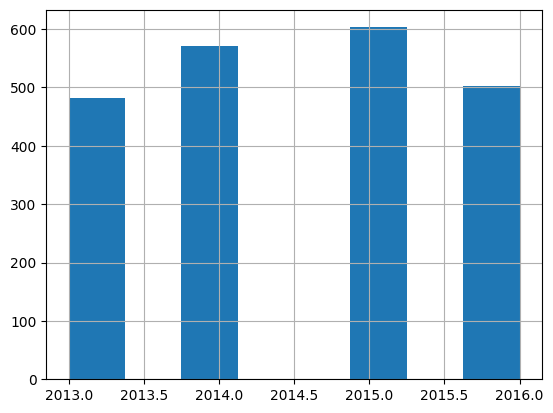

In [ ]:
actual_games['year_of_release'].hist(bins=8);

In [ ]:
year_platform_2016=actual_games.pivot_table(index='platform',values=['name','year_of_release','total_sales'],
                 aggfunc={'name': 'count','year_of_release': ['mean','max','median','min'],'total_sales':'sum'})
year_platform_2016.columns=['quantity','total_sales','last_year','mean','median','first_year']
year_platform_2016=year_platform_2016.loc[year_platform_2016['last_year']==2016].sort_values(by='total_sales',ascending=False)
year_platform_2016['first_year']=year_platform_2016['first_year'].astype('int')
year_platform_2016['median']=year_platform_2016['median'].astype('int')
year_platform_2016['last_year']=year_platform_2016['last_year'].astype('int')
year_platform_2016['last_year']=year_platform_2016['last_year'].astype('float')
year_platform_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, PS4 to Wii
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   quantity     9 non-null      int64  
 1   total_sales  9 non-null      float64
 2   last_year    9 non-null      float64
 3   mean         9 non-null      Float64
 4   median       9 non-null      int64  
 5   first_year   9 non-null      int64  
dtypes: Float64(1), float64(2), int64(3)
memory usage: 513.0+ bytes


In [ ]:
year_platform_2016

,quantity,total_sales,last_year,mean,median,first_year
platform,,,,,,
PS4,392,314.14,2016.0,2015.145408,2015,2013
PS3,345,181.43,2016.0,2014.066667,2014,2013
XOne,247,159.32,2016.0,2014.951417,2015,2013
3DS,303,143.25,2016.0,2014.287129,2014,2013
X360,186,136.80,2016.0,2013.924731,2014,2013
WiiU,115,64.63,2016.0,2014.121739,2014,2013
PC,189,39.43,2016.0,2014.634921,2015,2013
PSV,358,32.99,2016.0,2014.606145,2015,2013
Wii,23,13.66,2016.0,2013.73913,2013,2013


Отобрали данные с 2013 года и на самых популярных площадках

In [ ]:
actual_games.groupby('year_of_release')['name'].count()

year_of_release
2013    482
2014    571
2015    603
2016    502
Name: name, dtype: int64

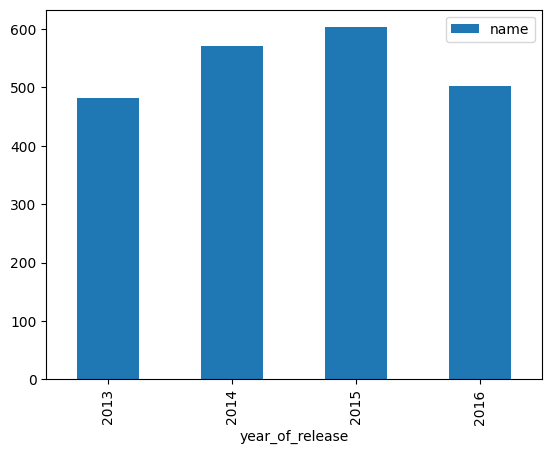

In [ ]:
actual_games.groupby('year_of_release')['name'].count().reset_index().plot.bar(x='year_of_release', y='name');

Количество игр выпущенных на популярные платформы с 2013 по 2016 год

In [ ]:
actual_games.groupby('year_of_release')['total_sales'].sum()

year_of_release
2013    356.56
2014    331.29
2015    267.86
2016    129.94
Name: total_sales, dtype: float64

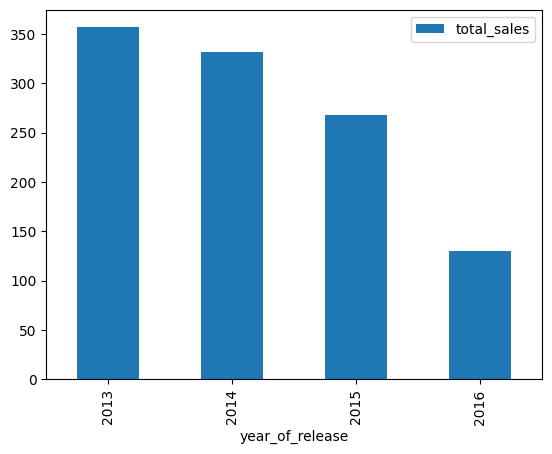

In [ ]:
actual_games.groupby('year_of_release')['total_sales'].sum().reset_index().plot.bar(x='year_of_release', y='total_sales');

Количество копий игр проданных на популярные платформы с 2013 по 2016 год (в млн. копий)

**В целом тренд на снижение сохраняется на двух графиках - игровая индустрия претерпевает спад. Вряд ли 2017 год будет успешным - по крайней мере ожидать этого не стоит**

In [ ]:
year_platform.sort_values(by='first_year').head(7)

,quantity,total_sales,last_year,mean,median,first_year,lifetime
platform,,,,,,,
2600,116,86.48,1989.0,1982.137931,1982,1980,9
NES,98,251.05,1994.0,1987.153061,1986,1983,11
DS,2122,802.79,2013.0,2008.185203,2008,1985,28
PC,957,255.76,2016.0,2008.914316,2010,1985,31
GB,97,254.43,2001.0,1995.958763,1997,1988,13
SNES,239,200.04,1999.0,1993.845188,1994,1990,9
GEN,27,28.35,1994.0,1993.037037,1993,1990,4


In [ ]:
games_year.head(4)

,name,year_of_release
year_of_release,,
1980,9,1980
1981,46,1981
1982,36,1982
1983,17,1983


In [ ]:
platform_born_year=platform_years_min_max.reset_index().groupby('first_year')['platform'].count()
platform_born_year=platform_born_year.reset_index()
platform_born_year.set_index('first_year', inplace=True)
platform_born_year

,platform
first_year,
1980,1
1983,1
1985,2
1988,1
1990,2
1992,1
1993,2
1994,3
1995,1


In [ ]:
games_year['first_year']=platform_born_year['platform']
games_year=games_year.fillna(0).astype('int')
games_year.head(10)

,name,year_of_release,first_year
year_of_release,,,
1980,9,1980,1
1981,46,1981,0
1982,36,1982,0
1983,17,1983,1
1984,14,1984,0
1985,14,1985,2
1986,21,1986,0
1987,16,1987,0
1988,15,1988,1


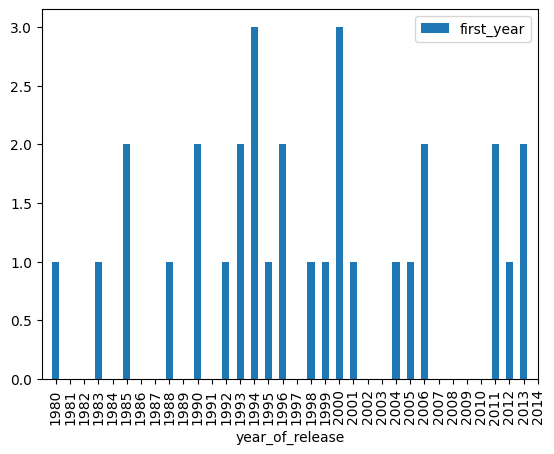

In [ ]:
games_year.plot.bar(x='year_of_release',y='first_year')
plt.xlim((1980-1981),(2014-1980));

In [ ]:
games_year['first_year'].count()/games_year['first_year'].sum()*12

14.322580645161292

**Новые приставки появляются примерно раз в 14 месяцев (чуть больше года)**

In [ ]:
platform_years_min_max

,first_year,last_year,mean_year,median_year,delta
platform,,,,,
2600,1980,1989,1984.5,1984.5,9
3DO,1994,1995,1994.5,1994.5,1
3DS,2011,2016,2013.5,2013.5,5
DC,1998,2008,2002.142857,2001.0,10
DS,1985,2013,2006.363636,2008.0,28
GB,1988,2001,1994.615385,1995.0,13
GBA,2000,2007,2003.5,2003.5,7
GC,2001,2007,2004.0,2004.0,6
GEN,1990,1994,1992.0,1992.0,4


In [ ]:
platform_last_year=platform_years_min_max.reset_index().groupby('last_year')['platform'].count()
platform_last_year=platform_last_year.reset_index()
platform_last_year.set_index('last_year', inplace=True)
platform_last_year

,platform
last_year,
1989,1
1992,1
1994,3
1995,2
1996,2
1999,2
2001,2
2002,1
2003,1


In [ ]:
games_year['last_year']=platform_last_year['platform']
games_year=games_year.fillna(0).astype('int')
games_year

,name,year_of_release,first_year,last_year
year_of_release,,,,
1980,9,1980,1,0
1981,46,1981,0,0
1982,36,1982,0,0
1983,17,1983,1,0
1984,14,1984,0,0
1985,14,1985,2,0
1986,21,1986,0,0
1987,16,1987,0,0
1988,15,1988,1,0


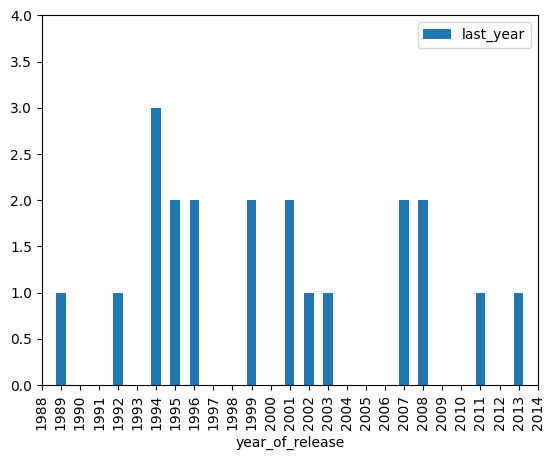

In [ ]:
games_year.plot.bar(x='year_of_release',y='last_year')
plt.ylim(0,4)
plt.xlim((1989-1981),(2015-1981));

In [ ]:
l=games_year[(games_year['year_of_release']>=1989) & (games_year['year_of_release']<=2015)]
l['last_year'].count()/games_year['last_year'].sum()*12

10.451612903225806

In [ ]:
l['last_year'].count()/l['last_year'].sum()*12

14.727272727272727

**Новые приставки появляются исчезают раз в 15 месяцев (чуть больше года)**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

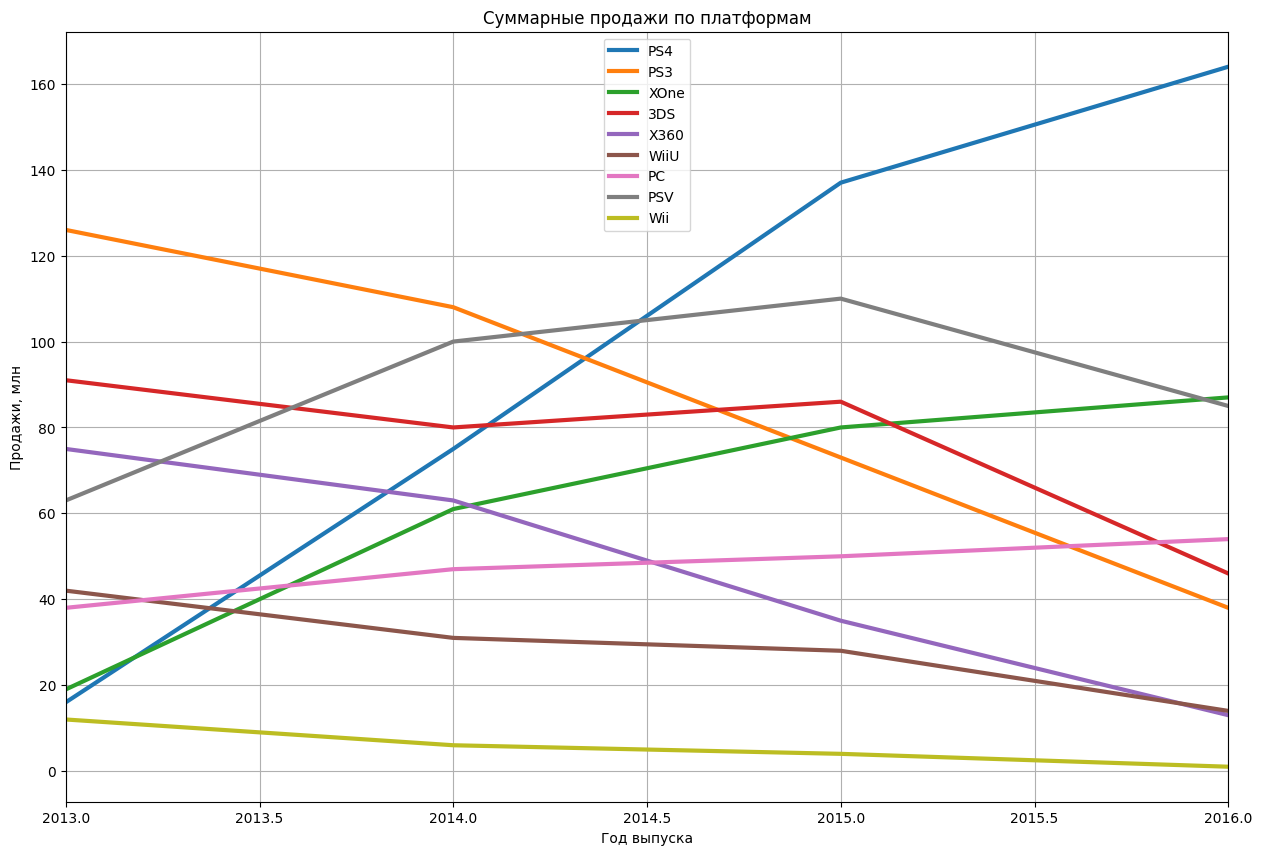

In [ ]:
platforms = list(year_platform_modern.index)[0:9]
plt.figure(figsize=(15,10))
for i in platforms:
    actual_games[actual_games['platform']==i].groupby(['year_of_release']).total_sales.agg('count').plot(linewidth= 3)
plt.xlim(2013,2016)
plt.grid(True)
plt.legend(platforms);
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн')
plt.title('Суммарные продажи по платформам');

In [ ]:
actual_games.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

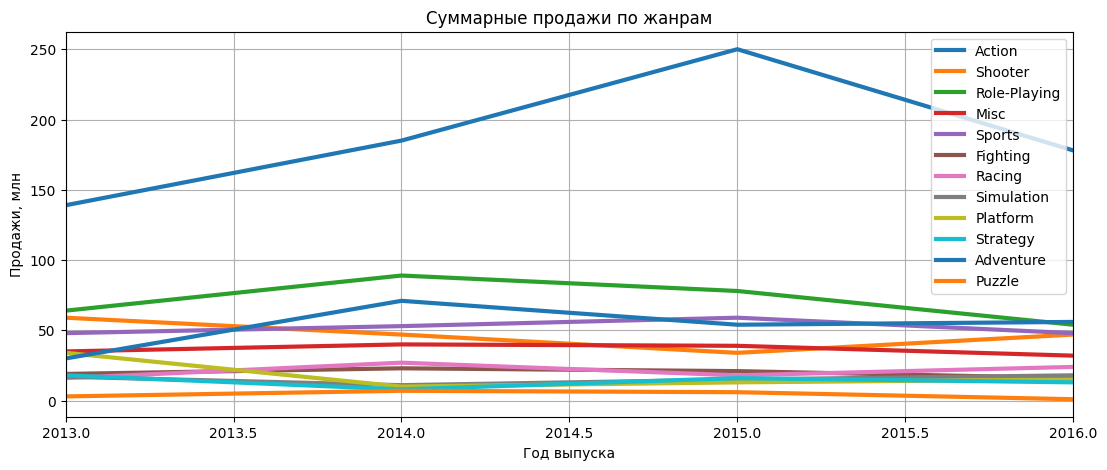

In [ ]:
plt.figure(figsize=(13,5))
for i in actual_games.genre.unique():
    actual_games[actual_games['genre']==i].groupby(['year_of_release']).total_sales.agg('count').plot(linewidth= 3)
plt.xlim(2013,2016)
plt.grid(True)
plt.legend(actual_games.genre.unique());
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн')
plt.title('Суммарные продажи по жанрам');

На графиках можно выделить три группы платформ:  
1. Платформы, продажи которых в 2016 году стремятся к нулю:  PS3, X360, 3DS, Wii, WiiU и PSV- игровые приставки предыдущего поколения или портативные игровые системы.
2. Платформы, продажи которых растут в 2016 году: PS4, XOne.
3. PC  
Портативные игровые системы 3DS, Wii и PSV на сегодняшний день теряют актуальность из-за насыщенного рынка игр для мобильных устройств.  
Актуальным примем период между началом продаж PS4 и XOne: 2013 год до 2016 года. Для данного периода определим жанры игр, которые являются лидерами продаж. Полученная информация позволит спрогнозировать прибыльные жанры в будущем.

Есть 9 платформ, активных на сегодняшний день: Wii, WiiU, PSV, X360, PS3, 3DS, PS4, XOne и PC.
Портативные игровые системы PSV, WiiU и 3DS на сегодняшний день неактуальны.
Wii, X360 и PS3 - игровые приставки предыдущего поколения, также неактуальны сегодня. Таким образом, потенциально прибыльные платформы - новые поколения игровых приставок PS4, XOne, портативная игровая система 3DS и персональные компьютеры PC.

In [ ]:
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,0,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,0,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,RP,<NA>,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,RP,<NA>,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,0,12.62


**Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Соотнеситем выводы с продажами игр на других платформах.**

1. Исследуем продажи/отзывы для платформ PS3, X360, PS4, XOne и PC.

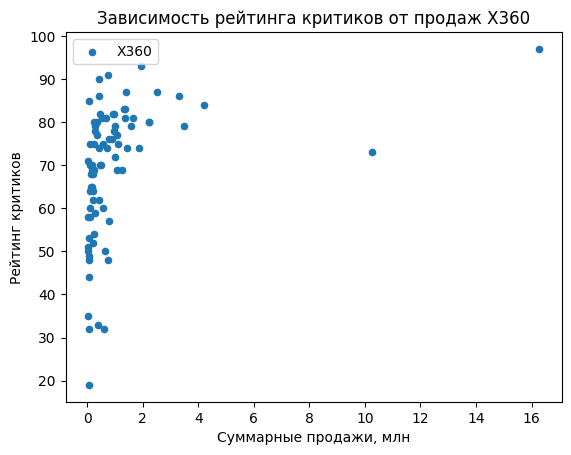

In [ ]:
ax=actual_games[(actual_games['platform']=='X360')].plot(x='total_sales', y='critic_score', kind='scatter')
plt.legend(['X360'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж X360');

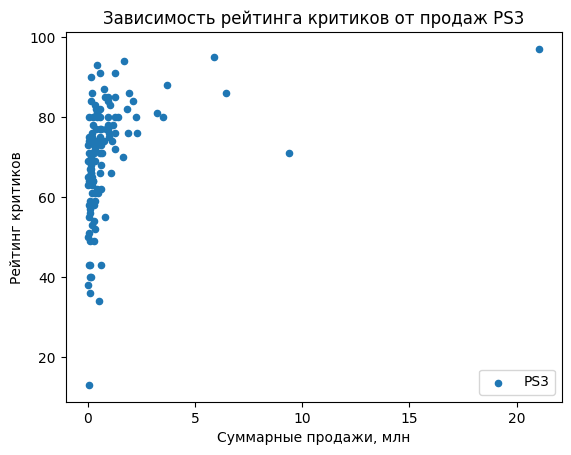

In [ ]:
ax=actual_games[(actual_games['platform']=='PS3')].plot(x='total_sales', y='critic_score', kind='scatter')
plt.legend(['PS3'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PS3');

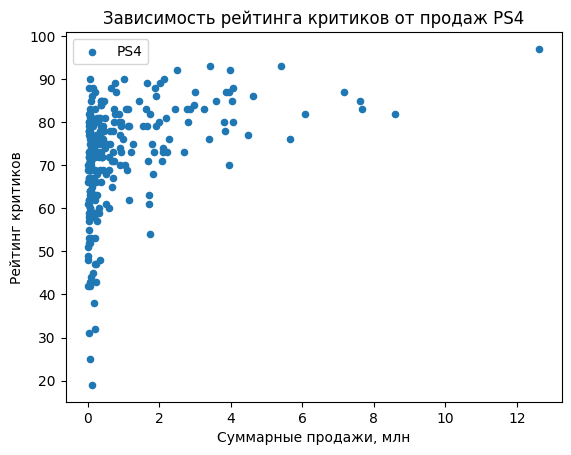

In [ ]:
ax=actual_games[(actual_games['platform']=='PS4')].plot(x='total_sales', y='critic_score', kind='scatter')
plt.legend(['PS4'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PS4');

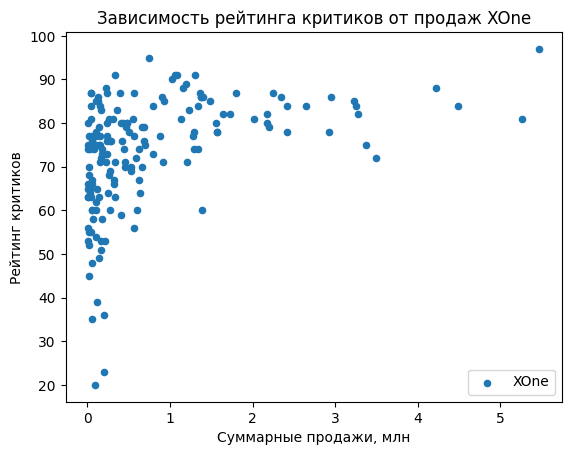

In [ ]:
ax=actual_games[(actual_games['platform']=='XOne')].plot(x='total_sales', y='critic_score', kind='scatter')
plt.legend(['XOne'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж XOne');

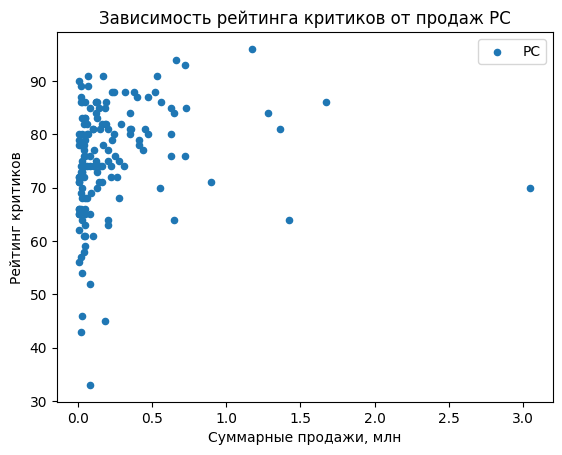

In [ ]:
ax=actual_games[(actual_games['platform']=='PC')].plot(x='total_sales', y='critic_score', kind='scatter')
plt.legend(['PC'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PC');

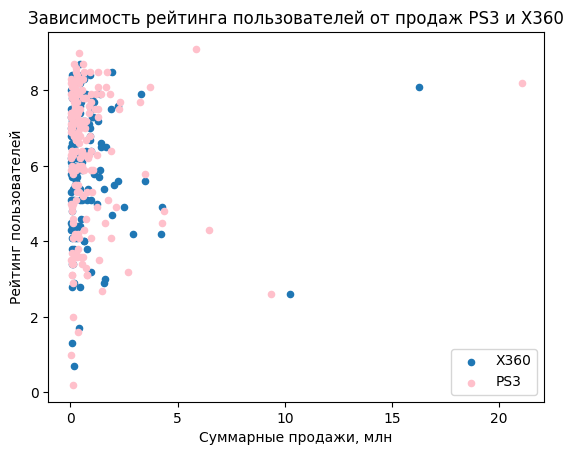

In [ ]:
ax=actual_games[(actual_games['platform']=='X360')].plot(x='total_sales', y='user_score', kind='scatter')
actual_games[(actual_games['platform']=='PS3')].plot(ax=ax, x='total_sales', y='user_score', kind='scatter', color='pink')
plt.legend(['X360', 'PS3'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг пользователей')
plt.title('Зависимость рейтинга пользователей от продаж PS3 и X360');

In [ ]:
def corr_func(platform,score_type):
    if score_type=='critic_score':
        score='критиков'
    else:
        score='пользователей'
    corrrr=actual_games[actual_games['platform']==platform]['total_sales']\
    .corr(actual_games[actual_games['platform']==platform][score_type].astype('float')).round(2)
    print(f'По игровой платформе {platform} корреляция суммарных продаж и оценки {score} равна {corrrr}')

In [ ]:
corr_func(platform='X360',score_type='user_score')

corr_func(platform='X360',score_type='critic_score')

corr_func(platform='PS3',score_type='user_score')

corr_func(platform='PS3',score_type='critic_score')

По игровой платформе X360 корреляция суммарных продаж и оценки пользователей равна -0.01
По игровой платформе X360 корреляция суммарных продаж и оценки критиков равна 0.35
По игровой платформе PS3 корреляция суммарных продаж и оценки пользователей равна 0.0
По игровой платформе PS3 корреляция суммарных продаж и оценки критиков равна 0.33


In [ ]:
print(f'Количество пропусков у критических оценок игр что выходили на X360 - {actual_games[actual_games["platform"]=="X360"]["critic_score"].isna().sum()}')

Количество пропусков у критических оценок игр что выходили на X360 - 105


По диаграмме рассеяния корреляции между рейтингом пользователей и критиков и суммарными продажам не наблюдается.  
Коэффициенты корреляции невысокие.  
Чтобы проверить зависимость продаж от рейтинга построим график зависимости средних продаж от средних рейтингов критиков и пользователей.

In [ ]:
actual_games['sales_X360_q'] = pd.qcut(actual_games[(actual_games['platform']=='X360')]['total_sales'],5)
actual_games['sales_PS3_q'] = pd.qcut(actual_games[(actual_games['platform']=='PS3')]['total_sales'],5)
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales,sales_X360_q,sales_PS3_q
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,0,21.05,NaN,"(0.61, 21.05]"
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,0,16.27,"(0.94, 16.27]",NaN
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,RP,<NA>,14.63,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,RP,<NA>,14.60,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,0,12.62,NaN,NaN


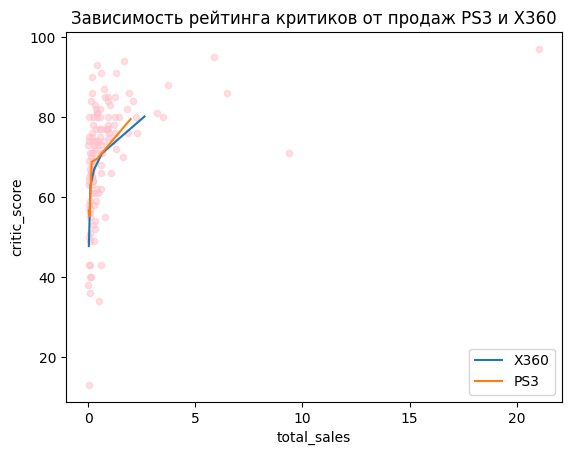

In [ ]:
ax = (actual_games.groupby('sales_X360_q')[['total_sales', 'critic_score']].agg(['mean']).plot(x=('total_sales','mean'),y=('critic_score','mean')))
(actual_games.groupby('sales_PS3_q')[['total_sales', 'critic_score']].agg(['mean']).plot(ax=ax, x=('total_sales','mean'),y=('critic_score','mean')))
plt.legend(['X360', 'PS3']);
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PS3 и X360');
actual_games[(actual_games['platform']=='PS3')].plot(ax=ax, x='total_sales', y='critic_score', kind='scatter', color='pink', alpha=0.5);

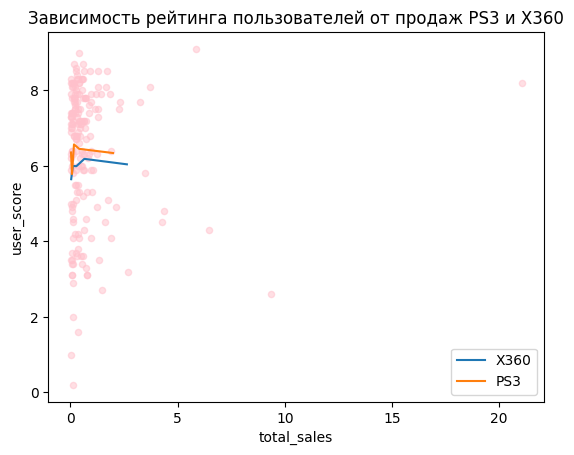

In [ ]:
ax = (actual_games.groupby('sales_X360_q')[['total_sales', 'user_score']].
    agg(['mean']).
    plot(
        x=('total_sales','mean'),
        y=('user_score','mean')
    ))
(actual_games.groupby('sales_PS3_q')[['total_sales', 'user_score']].agg(['mean']).plot(ax=ax, x=('total_sales','mean'),y=('user_score','mean')))
plt.legend(['X360', 'PS3'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг пользователей')
plt.title('Зависимость рейтинга пользователей от продаж PS3 и X360');
actual_games[(actual_games['platform']=='PS3')].plot(ax=ax, x='total_sales', y='user_score', kind='scatter', color='pink', alpha=0.5);

По диаграммам рассеяния выраженной зависимости не наблюдается. Коэффициент Пирсона меньше 0,5.  
Зависимости между продажами платформ PS3 и X360 и рейтингом критиков или пользователей не обнаружено.

2. Исследуем продажи/отзывы для платформ PS4, XOne.

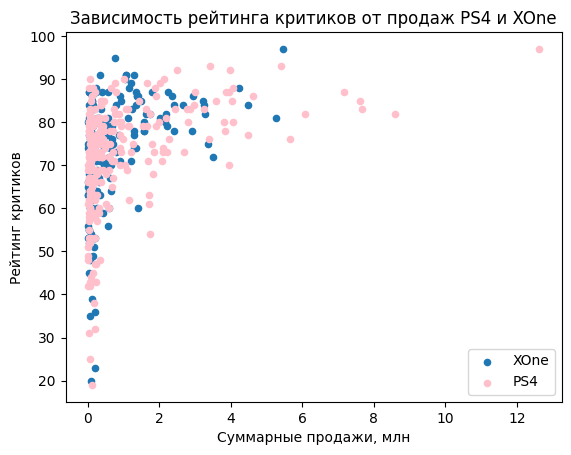

In [ ]:
ax=actual_games[(actual_games['platform']=='XOne')].plot(x='total_sales', y='critic_score', kind='scatter')
actual_games[(actual_games['platform']=='PS4')].plot(ax=ax, x='total_sales', y='critic_score', kind='scatter', color='pink')
plt.legend(['XOne', 'PS4'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PS4 и XOne');

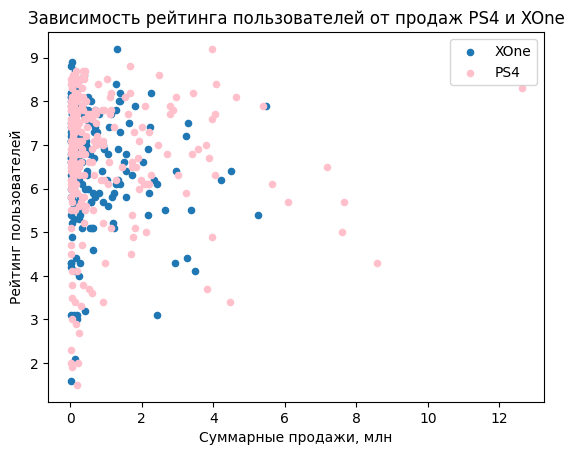

In [ ]:
ax=actual_games[(actual_games['platform']=='XOne')].plot(x='total_sales', y='user_score', kind='scatter')
actual_games[(actual_games['platform']=='PS4')].plot(ax=ax, x='total_sales', y='user_score', kind='scatter', color='pink')
plt.legend(['XOne', 'PS4'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг пользователей')
plt.title('Зависимость рейтинга пользователей от продаж PS4 и XOne');

In [ ]:
print('По игровой платформе XOne корреляция суммарных продаж и оценки пользователей равна')
actual_games['total_sales'].corr(actual_games['critic_score'].astype(float)).round(2)

По игровой платформе XOne корреляция суммарных продаж и оценки пользователей равна


0.31

In [ ]:
corr_func(platform='XOne',score_type='user_score')

corr_func(platform='XOne',score_type='critic_score')

corr_func(platform='PS4',score_type='user_score')

corr_func(platform='PS4',score_type='critic_score')

По игровой платформе XOne корреляция суммарных продаж и оценки пользователей равна -0.07
По игровой платформе XOne корреляция суммарных продаж и оценки критиков равна 0.42
По игровой платформе PS4 корреляция суммарных продаж и оценки пользователей равна -0.03
По игровой платформе PS4 корреляция суммарных продаж и оценки критиков равна 0.41


По диаграмме рассеяния корреляции между рейтингом пользователей и критиков и суммарными продажам не наблюдается.
Коэффициенты корреляции невысокие.
Чтобы проверить зависимость продаж от рейтинга построим график зависимости средних продаж от средних рейтингов критиков и пользователей.

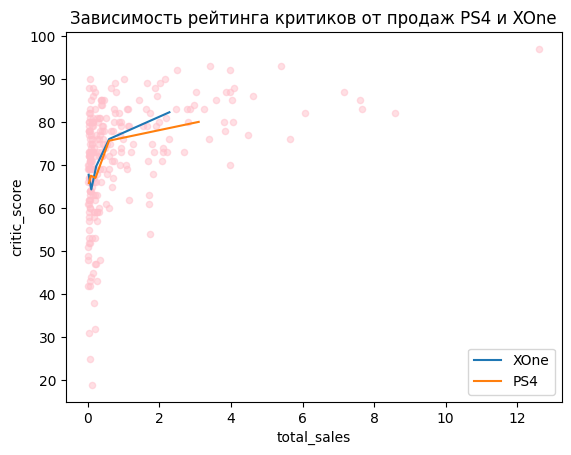

In [ ]:
actual_games['sales_XOne_q'] = pd.qcut(actual_games[(actual_games['platform']=='XOne')]['total_sales'],5)
actual_games['sales_PS4_q'] = pd.qcut(actual_games[(actual_games['platform']=='PS4')]['total_sales'],5)

ax = (actual_games.groupby('sales_XOne_q')[['total_sales', 'critic_score']].agg(['mean']).plot(x=('total_sales','mean'), y=('critic_score','mean')))
(actual_games.groupby('sales_PS4_q')[['total_sales', 'critic_score']].agg(['mean']).plot(ax=ax, x=('total_sales','mean'), y=('critic_score','mean')))
plt.legend(['XOne', 'PS4'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PS4 и XOne');
actual_games[(actual_games['platform']=='PS4')].plot(ax=ax, x='total_sales', y='critic_score', kind='scatter', color='pink', alpha=0.5);

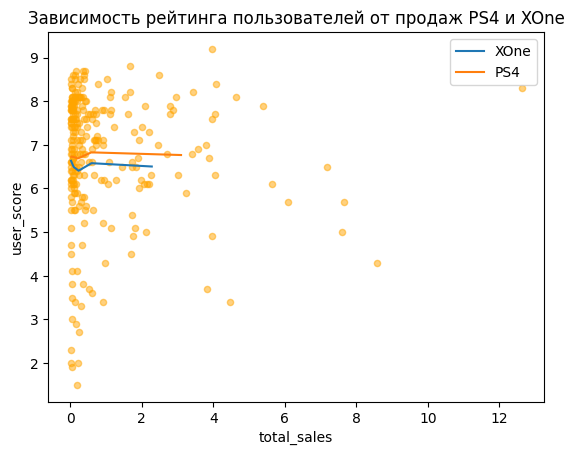

In [ ]:
ax = (actual_games.groupby('sales_XOne_q')[['total_sales', 'user_score']].agg(['mean']).plot(x=('total_sales','mean'), y=('user_score','mean')))
(actual_games.groupby('sales_PS4_q')[['total_sales', 'user_score']].agg(['mean']).plot(ax=ax,x=('total_sales','mean'), y=('user_score','mean')))
plt.legend(['XOne', 'PS4'])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг пользователей')
plt.title('Зависимость рейтинга пользователей от продаж PS4 и XOne');
actual_games[(actual_games['platform']=='PS4')].plot(ax=ax, x='total_sales', y='user_score', kind='scatter', color='orange', alpha=0.5);

По диаграммам рассеяния выраженной зависимости для платформ PS4 и XOne не наблюдается. Коэффициент Пирсона меньше 0,5.  
Зависимости между продажами платформ PS34 и XOne и рейтингом критиков или пользователей не обнаружено.

3. Исследуем продажи/отзывы для платформ PC.

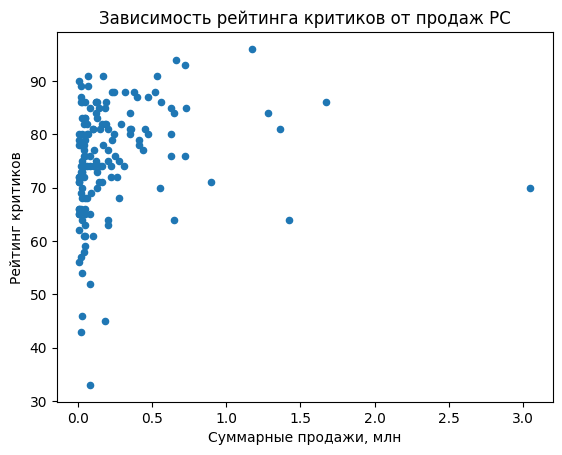

In [ ]:
actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)].plot(x='total_sales', y='critic_score', kind='scatter')
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PC');

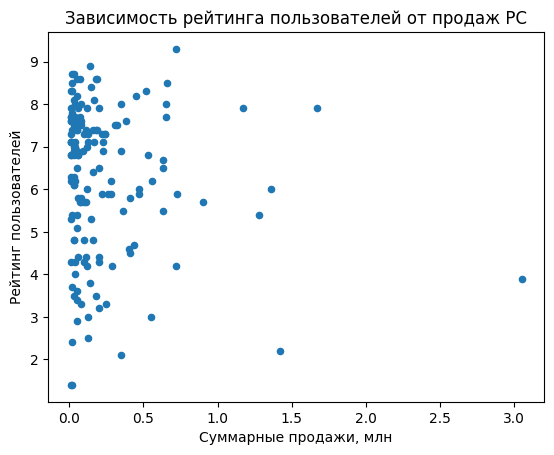

In [ ]:
actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)].plot(x='total_sales', y='user_score', kind='scatter')
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг пользователей')
plt.title('Зависимость рейтинга пользователей от продаж PC');

In [ ]:
actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)]['total_sales'].corr(actual_games[actual_games['platform']=='PC']['user_score'])

-0.09384186952476739

In [ ]:
actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)]['total_sales'].corr(actual_games[actual_games['platform']=='PC']['critic_score'].astype(float))

0.19603028294369382

По диаграмме рассеяния корреляции между рейтингом пользователей и критиков и суммарными продажам не наблюдается. Коэффициенты корреляции невысокие. Чтобы проверить зависимость продаж от рейтинга построим график зависимости средних продаж от средних рейтингов критиков и пользователей.

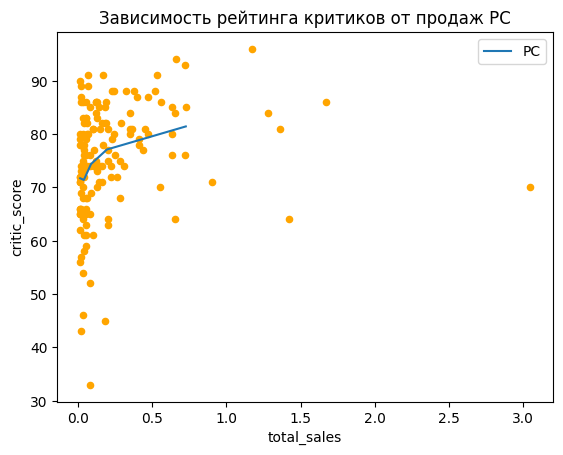

In [ ]:
actual_games['sales_PC_q'] = pd.qcut(actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)]['total_sales'],5)

ax = (
    actual_games.groupby('sales_PC_q')[['total_sales', 'critic_score']].
    agg(['mean']).
    plot(
        x=('total_sales','mean'),
        y=('critic_score','mean')
    )
)
plt.legend(["PC"])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг критиков')
plt.title('Зависимость рейтинга критиков от продаж PC');
actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)].plot(ax=ax, x='total_sales', y='critic_score', kind='scatter', color='orange');

In [ ]:
actual_games['total_sales'].corr(actual_games['critic_score'].astype(float))

0.31378891013587495

<Axes: title={'center': 'Зависимость рейтинга пользователей от продаж PC'}, xlabel='total_sales', ylabel='user_score'>

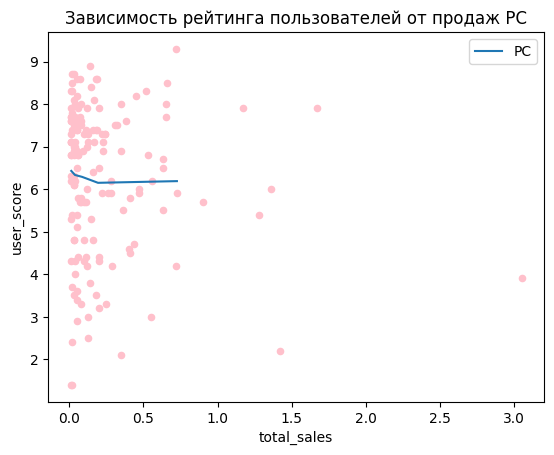

In [ ]:
ax = (actual_games.groupby('sales_PC_q')[['total_sales', 'user_score']].agg(['mean']).plot(x=('total_sales','mean'), y=('user_score','mean')))
plt.legend(["PC"])
plt.xlabel('Суммарные продажи, млн')
plt.ylabel('Рейтинг пользователей')
plt.title('Зависимость рейтинга пользователей от продаж PC');
actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)].plot(ax=ax, x='total_sales', y='user_score', kind='scatter', color='pink')

По диаграммам рассеяния выраженной зависимости для платформ PC не наблюдается. Коэффициент Пирсона меньше 0,5.
Зависимости между продажами платформы PC и рейтингом критиков или пользователей не обнаружено.


<font color='DarkGreen'> Для оценки корреляции пользоваться вот этой шкалой:</font>
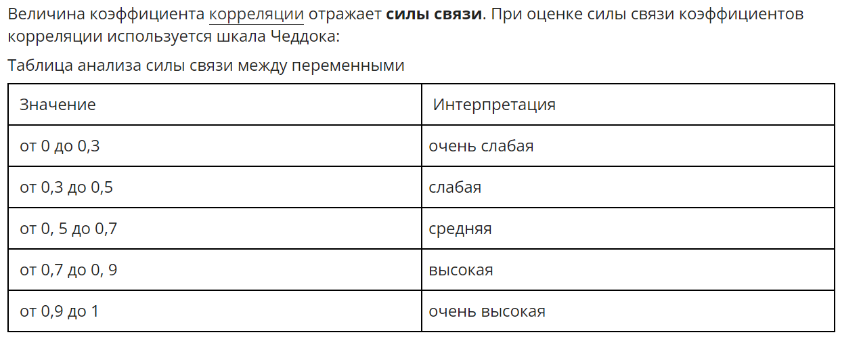

Для всех платформ нет зависимости между рейтингом пользователей и количеством продаж.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [ ]:
genres = (pd.DataFrame(actual_games[actual_games['year_of_release']>=2013].groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False)))
genres

,total_sales
genre,
Action,320.51
Shooter,232.98
Sports,149.93
Role-Playing,144.86
Misc,62.57
Platform,41.94
Racing,39.89
Fighting,35.29
Adventure,22.90


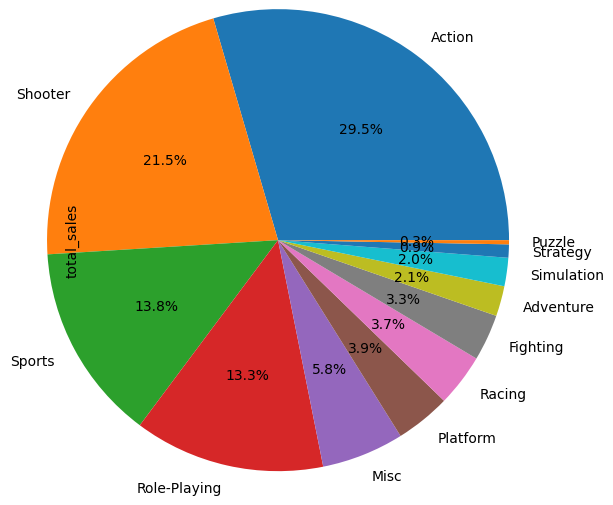

In [ ]:
genres['total_sales'].plot.pie(figsize=(5,5), autopct='%1.1f%%', radius=1.5);

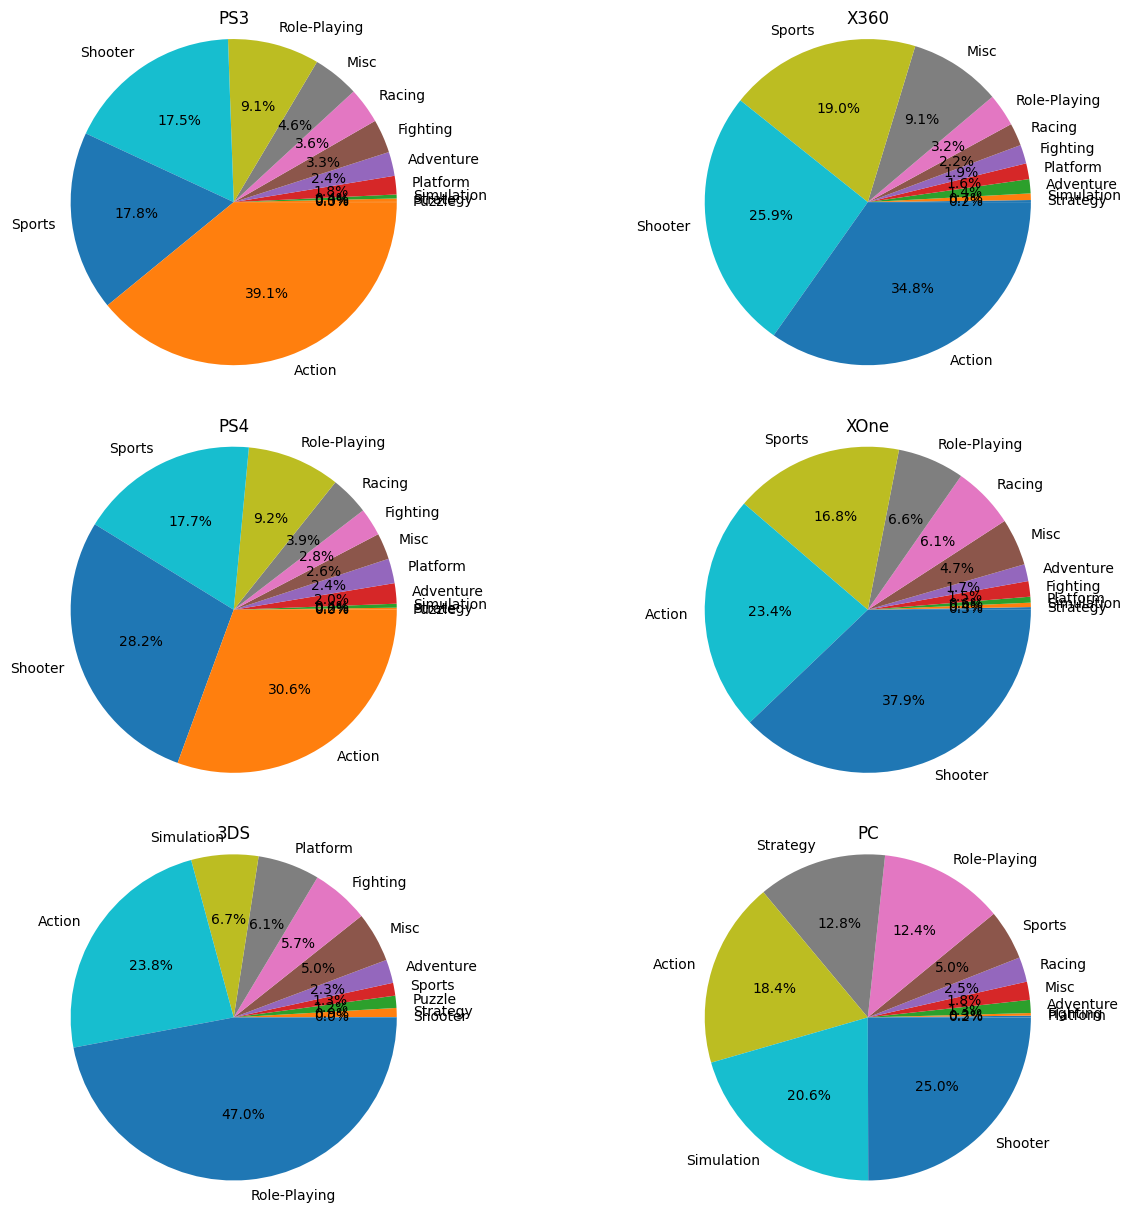

In [ ]:
pltf_list = ['PS3', 'X360', 'PS4', 'XOne', '3DS', 'PC']
fig, axs = plt.subplots(3,2,figsize=(15,15))
for i in list(range(6)):
    temp = (
        actual_games[(actual_games['year_of_release']>=2013) &
           (actual_games['platform']==pltf_list[i])].
        groupby('genre')['total_sales'].agg('sum').sort_values()
    )
    axs[round(i/2.1),i%2].pie(temp, labels=temp.index, autopct='%1.1f%%', radius=1.2)
    axs[round(i/2.1), i%2].set_title(pltf_list[i])

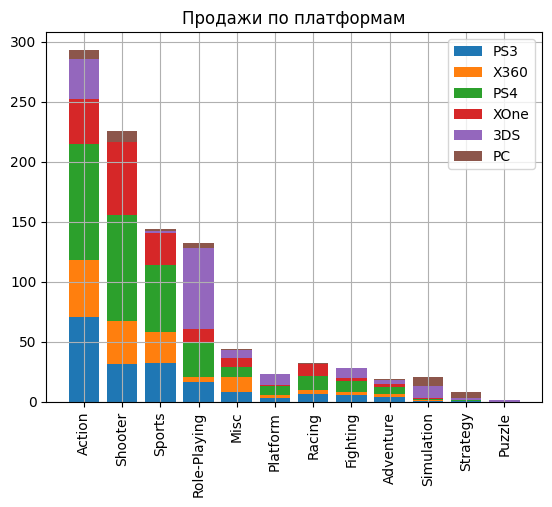

In [ ]:
y_offset =  actual_games[(actual_games['year_of_release']>=2013)].groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False) * 0
actual_games_temp = y_offset.copy()
pltf_list = ['PS3', 'X360', 'PS4', 'XOne', '3DS', 'PC']
for i in pltf_list:
    temp = (
        actual_games[(actual_games['year_of_release']>=2013) &
           (actual_games['platform']==i)].
        groupby('genre')['total_sales'].agg('sum')
    )
    temp = pd.concat([actual_games_temp, temp], axis=1)
    temp.columns = ['first', 'total_sales']
    temp = temp['total_sales'].fillna(0)
    plt.bar(temp.index, temp, bottom=y_offset)
    y_offset = y_offset + temp
plt.legend(pltf_list)
plt.grid(True)
plt.xticks(rotation=90)
plt.title('Продажи по платформам');

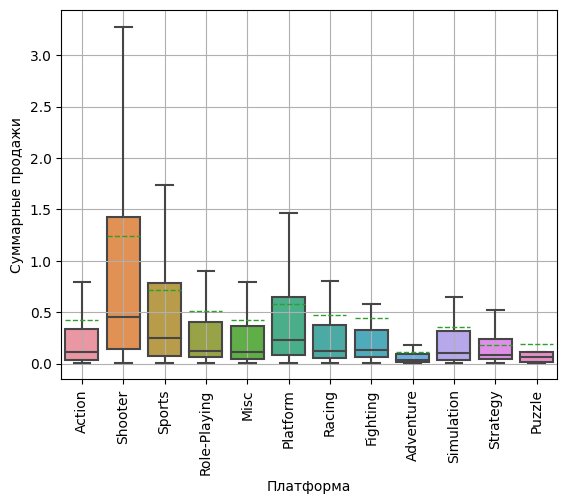

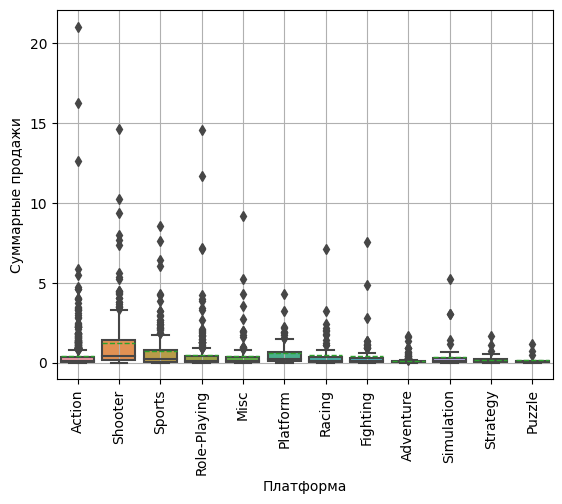

In [ ]:
sns.boxplot(
    x=actual_games[(actual_games['year_of_release']>=2013)]['genre'],
    y=actual_games[(actual_games['year_of_release']>=2013)]['total_sales'],
    order=actual_games_temp.index,
    showfliers=False,
    showmeans=True,
    meanline=True
)
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи');
plt.xticks(rotation=90)
plt.show()

sns.boxplot(
    x=actual_games[(actual_games['year_of_release']>=2013)]['genre'],
    y=actual_games[(actual_games['year_of_release']>=2013)]['total_sales'],
    order=actual_games_temp.index,
    showfliers=True,
    showmeans=True,
    meanline=True
)
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи');
plt.xticks(rotation=90);

**Самые продаваемые игры по жанрам по общим продажам:**

**Action - 320.51 ***

**Shooter- 149.93  ***

**Sports - 150.65 ***

**Самые низкие продажи у жанров** Puzzle, Strategy, Simulation.

По платформам PS3, X360, PS4, XOne **лидерами продаж также являются жанры** Action, Shooter, Sports.  
Для платофрмы **3DS лидером продаж** является жанр Role-Playing и Action. Для PC: Shooter, Simulation и Action.  
Медианные продажи для всех жанров разные. **Меньший разброс имеет при больших продажах** имеет Action. Также для этого жанра наблюдаются аномально большие продажи. Жанр Shooter имеет большой разброс продаж.

**Выводы**

**В данном разделе был проведен анализ данных по выпуску и продажам игр.  
Пик выпуска игр попадает на период 2007-2009гг, затем выпуск игр снижается. На пике выпускалось более 1400 игр в год. До 1993 года выпускалось мало игр.  
Для платформ характерна периодичность их существования. В среднем активное время существования платформы 10 лет.  
Для прогнозирования успешности игр был принят актуальный период между началом продаж PS4 и XOne: 2013 год до 2016 года.  
Были определены наиболее успешные платформы предыдущего поколения X360 и PS3. И потенциально прибыльные платформы - новые поколения игровых приставок PS4, XOne, портативная игровая система 3DS и персональные компьютеры PC.   
Зависимость между рейтингами пользоваетелей и критиков и продажами не наблюдается.  
Самые продаваемые игры по жанрам Action, Shooter и Sports. Самые низкие продажи у жанров Puzzle, Strategy, Simulation.  
Лидерами продаж за актуальный период являются PS4 и XOne.**

# Шаг 4. Составьте портрет пользователя каждого региона

**Самые популярные платформы для каждого региона (топ-5). Опишите различия в долях продаж.**

In [ ]:
region_actual_games= (
    actual_games[actual_games['year_of_release']>=2013].
    pivot_table
    (
        index='platform',
        values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
        aggfunc='sum'
    ).
    sort_values('total_sales', ascending=False).
    head(5)
).reset_index()

region_actual_games = region_actual_games.append(pd.DataFrame((actual_games[actual_games['year_of_release']>=2013].
    pivot_table
    (
        index='platform',
        values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
        aggfunc='sum'
    ).
    sort_values('total_sales', ascending=False).
    tail(-5)
).sum()).T, ignore_index = True).sort_values('total_sales', ascending=False).reset_index()
region_actual_games['platform'] = region_actual_games['platform'].fillna('Other')
region_actual_games

,index,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,0,PS4,141.09,15.96,108.74,48.35,314.14
1,1,PS3,67.81,23.35,63.50,26.77,181.43
2,2,XOne,51.59,0.34,93.12,14.27,159.32
3,5,Other,57.24,29.52,51.92,12.03,150.71
4,3,3DS,30.96,67.81,38.20,6.28,143.25
5,4,X360,42.52,0.51,81.66,12.11,136.80


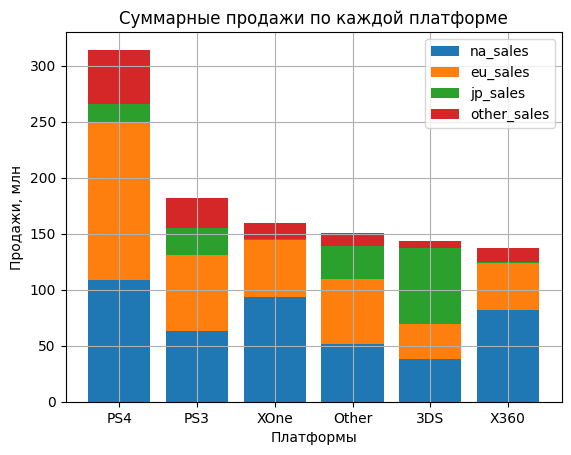

In [ ]:
y_offset = np.zeros(len(region_actual_games))
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for i in region_list:
    plt.bar(region_actual_games['platform'], region_actual_games[i], bottom=y_offset)
    y_offset = y_offset + region_actual_games[i]
plt.legend(region_list)
plt.grid(True)
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн')
plt.title('Суммарные продажи по каждой платформе');

PS4, PS3 и XOne - лидеры по продажам в мире. Больше всего покупателей в Америке и Европе.
PS4 - лидер по продажам из современных платформ. Больше всего покупателей в Европе и Америке.  
XOne в Японии почти не продается.

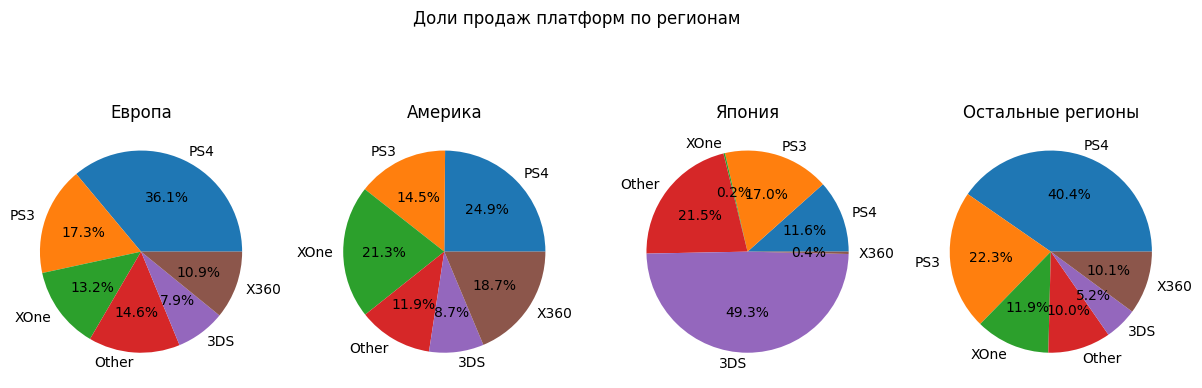

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(15,5))
axs[0].pie(region_actual_games['eu_sales'], labels=region_actual_games['platform'], autopct='%1.1f%%', radius=1)
axs[1].pie(region_actual_games['na_sales'], labels=region_actual_games['platform'], autopct='%1.1f%%', radius=1)
axs[2].pie(region_actual_games['jp_sales'], labels=region_actual_games['platform'], autopct='%1.1f%%', radius=1)
axs[3].pie(region_actual_games['other_sales'], labels=region_actual_games['platform'], autopct='%1.1f%%', radius=1)
axs[0].set_title('Европа')
axs[1].set_title('Америка')
axs[2].set_title('Япония')
axs[3].set_title('Остальные регионы')
fig.suptitle('Доли продаж платформ по регионам');

В Европе лидеры продаж PS4 - 36% и PS3 - 17%.
В Америке лидеры продаж PS4 - 25% и XOne - 21%.
В Японии лидер продаж портативная система 3DS - 49% и остальные платформы - 21%. А по приставкам: PS4 - 11% и PS3 - 17%.
В остальном мире лидер продаж PS4 - 40%.
Пользователи из Японии предпочитают портативные игровые системы и платформы японских разработчиков.
Во всем мире, кроме Японии, лидером продаж является PS4.

**Самые популярные жанры (топ-5). Поясните разницу.**

In [ ]:
# построим датафрейм с данными по жанрам и продажам по регионам
genre_actual_games = (
    actual_games[actual_games['year_of_release']>=2013].
    pivot_table
    (
        index='genre',
        values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
        aggfunc='sum'
    ).
    sort_values('total_sales', ascending=False).
    head(5)
).reset_index()

# добавим строку с невошедшими топ-5 жанрами
genre_actual_games = genre_actual_games.append(pd.DataFrame(
    (actual_games[actual_games['year_of_release']>=2013].
        pivot_table
        (
            index='genre',
            values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
            aggfunc='sum'
        ).
        sort_values('total_sales', ascending=False).
        tail(-5)
    ).sum()).T, ignore_index = True).sort_values('total_sales', ascending=False).reset_index()
genre_actual_games['genre'] = genre_actual_games['genre'].fillna('Other')
genre_actual_games

,index,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,0,Action,117.87,39.65,125.83,37.16,320.51
1,1,Shooter,87.86,6.61,109.74,28.77,232.98
2,5,Other,68.17,27.28,62.44,16.91,174.80
3,2,Sports,60.34,4.91,65.27,19.41,149.93
4,3,Role-Playing,36.97,50.01,46.40,11.48,144.86
5,4,Misc,20.00,9.03,27.46,6.08,62.57


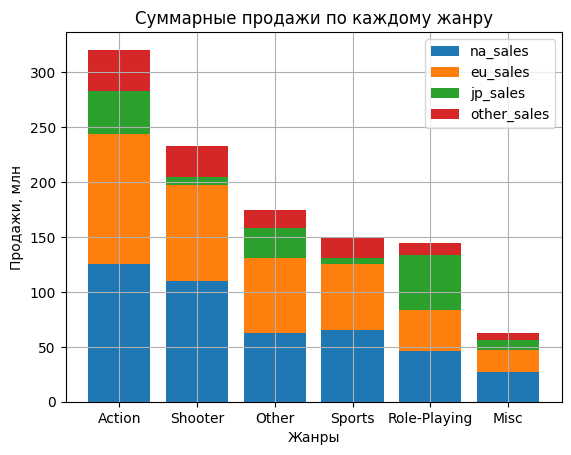

In [ ]:
y_offset = np.zeros(len(genre_actual_games))
pltf_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for i in pltf_list:
    plt.bar(genre_actual_games['genre'], genre_actual_games[i], bottom=y_offset)
    y_offset = y_offset + genre_actual_games[i]
plt.legend(pltf_list)
plt.grid(True)
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн')
plt.title('Суммарные продажи по каждому жанру');

Самый продаваемый жанр Action с наибольшими продажами в Америке и Европе.  
Наименьшие продажи у жанра Misc.  
Самым популярным жанром в Японии является Role-Playing.

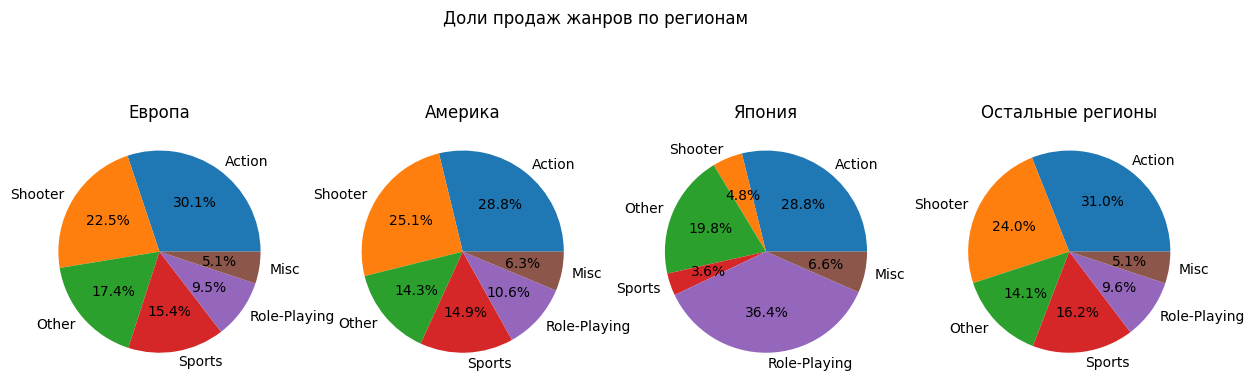

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(15,5))
axs[0].pie(genre_actual_games['eu_sales'], labels=genre_actual_games['genre'], autopct='%1.1f%%', radius=1)
axs[1].pie(genre_actual_games['na_sales'], labels=genre_actual_games['genre'], autopct='%1.1f%%', radius=1)
axs[2].pie(genre_actual_games['jp_sales'], labels=genre_actual_games['genre'], autopct='%1.1f%%', radius=1)
axs[3].pie(genre_actual_games['other_sales'], labels=genre_actual_games['genre'], autopct='%1.1f%%', radius=1)
axs[0].set_title('Европа')
axs[1].set_title('Америка')
axs[2].set_title('Япония')
axs[3].set_title('Остальные регионы')
fig.suptitle('Доли продаж жанров по регионам');


<font color='DarkGreen'>Данные не вошедшие в ТОП, просуммированы и выведены отдельной группой "Другие". Визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.</font>

Во всем мире, кроме Японии, лидерами продаж являются жанры Action и Shooter.  
В Японии лидером продаж является Role-Playing и Action. Жанры Sport и Shooter не популярны.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [ ]:
rating_actual_games = (
    actual_games[actual_games['year_of_release']>=2013].
    pivot_table
    (
        index='rating',
        values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
        aggfunc='sum'
    ).
    sort_values('total_sales', ascending=False).
    head(5)
).reset_index()
rating_actual_games

,rating,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,M,145.32,14.11,165.21,47.04,371.68
1,RP,78.61,82.05,89.18,23.41,273.25
2,E,82.80,15.00,78.94,22.53,199.27
3,T,41.95,20.44,49.79,14.29,126.47
4,E10+,42.53,5.89,54.02,12.54,114.98


«E» («Everyone») — «Для всех»  
«M» («Mature») — «Для взрослых»  
«T» («Teen») — «Подросткам»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»   
«EC» («Early childhood») — «Для детей младшего возраста»  
«RP» («Rating Pending») — «Рейтинг ожидается»

In [ ]:
(actual_games[actual_games['year_of_release']>=2013].pivot_table
    (
        index='rating',
        values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
        aggfunc='sum'
    ).
    sort_values('total_sales', ascending=False).
    tail(-5)).sum()

eu_sales       0.0
jp_sales       0.0
na_sales       0.0
other_sales    0.0
total_sales    0.0
dtype: float64

Список рейтингов за исследуемый период состоит всего из пяти позиций. Остальные рейтинги вне исслдеуемого диапазона.

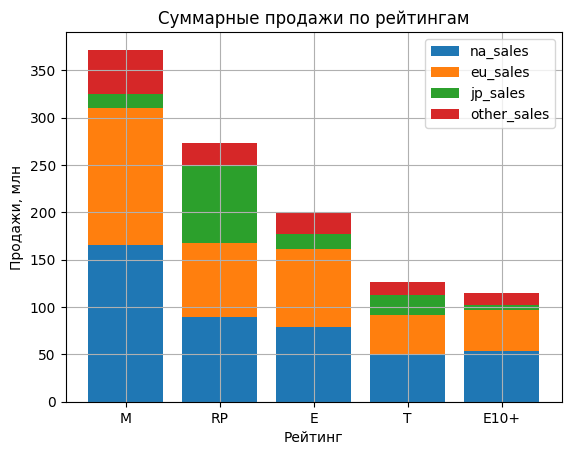

In [ ]:
y_offset = np.zeros(len(rating_actual_games))
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for i in region_list:
    plt.bar(rating_actual_games['rating'], rating_actual_games[i], bottom=y_offset)
    y_offset = y_offset + rating_actual_games[i]
plt.legend(region_list)
plt.grid(True)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн')
plt.title('Суммарные продажи по рейтингам');

Наиболее продаваемые игры с рейтингом M - "для взрослых".

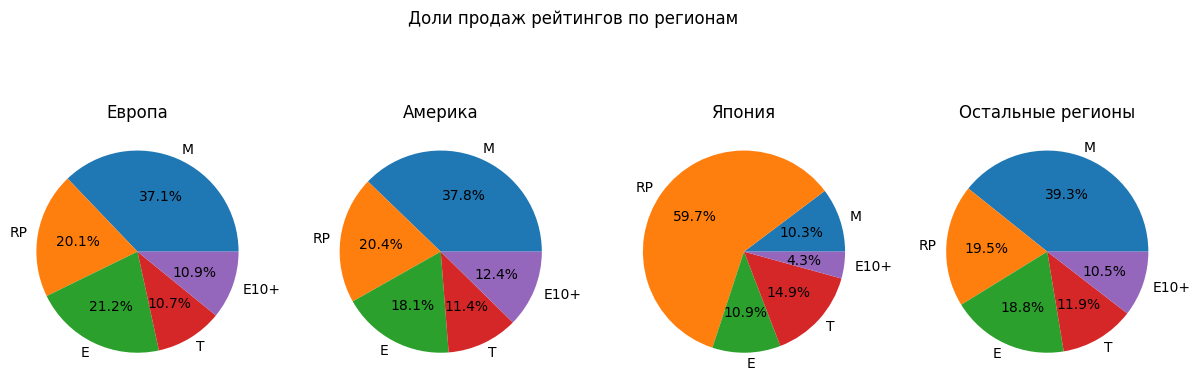

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(15,5))
axs[0].pie(rating_actual_games['eu_sales'], labels=rating_actual_games['rating'], autopct='%1.1f%%', radius=1)
axs[1].pie(rating_actual_games['na_sales'], labels=rating_actual_games['rating'], autopct='%1.1f%%', radius=1)
axs[2].pie(rating_actual_games['jp_sales'], labels=rating_actual_games['rating'], autopct='%1.1f%%', radius=1)
axs[3].pie(rating_actual_games['other_sales'], labels=rating_actual_games['rating'], autopct='%1.1f%%', radius=1)
axs[0].set_title('Европа')
axs[1].set_title('Америка')
axs[2].set_title('Япония')
axs[3].set_title('Остальные регионы')
fig.suptitle('Доли продаж рейтингов по регионам');

Лидер продаж игры с рейтингом М в мире, кроме Японии.  
В Японии лидируют продажи игр с рейтингом RP. Возможно, это игры были выпущены в Японии и не имеют рейтинга по классификации ESRB.

<font color='DarkGreen'>Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данным и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

**Выводы**

**Во всех ркгионах есть свои лидеры, так в Америке и Европе это PS4 в Японии 3DS и тд.
Во всем мире, кроме Японии, лидерами продаж являются жанры Action и Shooter.  
По рейтингу ESRP наиболее продаваемые игры с рейтингом М во всем мире, кроме Японии.  
Пользователи из Японии предпочитают исключительно платформы японских разработчиков типа 3DS.  
В Японии лидером продаж является Role-Playing и Action, а жанры Sport и Shooter не популярны.**

# Шаг 5. Проверьте гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Для тестирования гипотез использован двусторонний t-тест Стьюдента.

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [ ]:

alpha = 0.05

results = st.ttest_ind(
    actual_games[actual_games['platform']=='XOne']['user_score'].dropna(),
    actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>=2013)]['user_score'].dropna(),
    equal_var = False
)

print(
    'Средний рейтинг платформы Xbox One:',
    actual_games[actual_games['platform']=='XOne']['user_score'].mean()
)
print(
    'Средний рейтинг платформы PC:',
    actual_games[actual_games['platform']=='PC']['user_score'].mean()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний рейтинг платформы Xbox One: 6.521428571428572
Средний рейтинг платформы PC: 6.269677419354839
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученное Р-значение больше уровня статистической значимости. Т.е. вероятность получить такое или большее различие между средними случайно почти 15% и гипотеза о равенстве между средними пользовательскими рейтингами платформ Xbox One и PC не может быть отвергнута.

**Средние пользовательские рейтинги жанров Action и Sports разные**

Для тестирования гипотез использован двусторонний t-тест Стьюдента.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.  
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [ ]:

alpha = 0.05

results = st.ttest_ind(
    actual_games[(actual_games['genre']=='Action') & (actual_games['year_of_release']>=2013)]['user_score'].dropna(),
    actual_games[(actual_games['genre']=='Sports') & (actual_games['year_of_release']>=2013)]['user_score'].dropna(),
    equal_var = False
)

print(
    'Средний рейтинг жанра Action:',
    actual_games[actual_games['genre']=='Action']['user_score'].mean()
)
print(
    'Средний рейтинг жанра Sports:',
    actual_games[actual_games['genre']=='Sports']['user_score'].mean()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний рейтинг жанра Action: 6.842783505154639
Средний рейтинг жанра Sports: 5.249685534591195
p-значение: 2.419141451747253e-20
Отвергаем нулевую гипотезу


Полученное значение p-value меньше уровня статистической значимости. Т.е. маловероятна случайность полученных результатов, что дает основание отвергнуть гипотезу, что средние рейтинги пользователей жанров Action и Sports равны.

<font color='DarkGreen'>Средние пользовательские рейтинги и по платформам, и по жанрам, дополнительно показаны как иллюстрации не противоречивости наших гипотез.</font>

# Общий вывод

С целью выявить определяющие успешность игры закономерности были исследованы параметры популярности компьютерных игр и выполнены следующие задачи:  
- считаны и изучены данные из исходных файлов;
- подготовлены данные: изменены названия столбцов, преобразованы данные в нужные типы, обработаны пропуски;   
- проведен исследовательский анализ данных: сколько игр выпускалось в разные годы, как менялись продажи по платформам, определен актуальный период, определены лидирующие платформы по продажам, построен график «ящик с усами» по глобальным продажам игр, проведен анализ, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, изучено общее распределение игр по жанрам,
- составлен портрет пользователя каждого региона: определены самые популярные платформы,  определены самые популярные жанры, исследовано влияние рейтинга ESRB на продажи в отдельном регионе;  
- проверены гипотезы:  
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - средние пользовательские рейтинги жанров Action и Sports разные.
- написан общий вывод.

По результатам анализа данных по выпуску и продажам игр было определено, что пик выпуска игр попадает на период 2007-2009гг, затем выпуск игр снижается. На пике выпускалось более 1400 игр в год. До 1993 года выпускалось мало игр.  
Для платформ характерна периодичность их существования. В среднем активное время существования платформы 10 лет.  
Для прогнозирования успешности игр был принят актуальный период между началом продаж с 2013 по 2016 год.  
Были определены наиболее успешные платформы предыдущего поколения X360 и PS3. И потенциально прибыльные платформы - новые поколения игровых приставок PS4, XOne, портативные игровые системы 3DS и персональные компьютеры PC.  
Зависимости между рейтингами пользователей и критиков и продажами не наблюдается.  
Самые продаваемые игры по жанрам Action, Shooter и Sports. Самые низкие продажи у жанров Puzzle, Strategy, Simulation.  
Лидером продаж за актуальный период является PS4.  

По результатам анализа продаж игр по регионам было обнаружено, что во всем мире, кроме Японии, лидером продаж является PS4.  
Во всем мире, кроме Японии, лидерами продаж являются жанры Action, Shooter и Sport.  
По рейтингу ESRB наиболее продаваемые игры с рейтингом М во всем мире, кроме Японии.  
Пользователи из Японии предпочитают исключительно платформы японских разработчиков типа 3DS.  
В Японии лидером продаж является Role-Playing и Action, а жанры Sport и Shooter не популярны.

Таким образом по результатам проведеннго анализа, следует, что потенциально успешным будет продукт, выпущенный для платформы PS4, в жанре Action с рейтингом M.